# Wasserstein Metric

In [1]:
import numpy as np
import scipy as sp

np.random.seed(123)
n = 10

In [86]:
def new_cov(n=5):
    S = np.random.randn(n, n)
    return S.dot(S.T)

def std_corr(S):
    std = np.diag(np.diag(S)**0.5)
    std_1 = np.linalg.inv(std)
    R = std_1.dot(S).dot(std_1)
    return std, R

def std(S):
    return np.diag(np.diag(S)**0.5)

def corr(S):
    return std_corr(S)[1]

def root(S):
    L, Q = np.linalg.eig(S)
    return Q.dot(np.diag(L**0.5)).dot(Q.T)

In [87]:
def w2_cost(P, Q, P2=None):
    if P2 is None:
        P2 = root(P)
    return np.sum(np.abs(np.diag(P + Q -2*root(P2.dot(Q).dot(P2)) )))**0.5

def w2_map(P, Q):
    P2 = root(P)
    P_2 = np.linalg.inv(P2)
    return P_2.dot(root(P2.dot(Q).dot(P2))).dot(P_2)

In [88]:
Ra = np.array([[1.0,0.5],[0.5,1.0]])
Rb = np.array([[1.0,0.99],[0.99,1.0]])
Rc = np.array([[1.0,0.9999],[0.9999,1.0]])

print(w2_cost(Ra, Rb), 
      w2_cost(Rb, Rc),
      w2_cost(Ra, Rc))

0.634939473595 0.0900682090525 0.722386913545


In [89]:
P = new_cov(n)
Q = new_cov(n)

In [90]:
w2_cost(P, Q)

7.6816880576358963

In [91]:
w2_map(P, Q)

array([[ 1.80624056,  1.41160577,  0.18493527,  0.33467164,  0.49437007,
        -1.46527767,  0.37528919, -0.21571462, -0.05597729,  0.55002761],
       [ 1.41160577,  3.43637831,  0.10142541,  0.6349212 ,  0.40942318,
        -2.14054419,  0.44564346, -0.39044357, -0.07541985,  1.54741196],
       [ 0.18493527,  0.10142541,  2.10352626,  1.13705138, -0.5231232 ,
         1.29907473,  0.93424695, -0.36659601,  0.15289186,  0.40056807],
       [ 0.33467164,  0.6349212 ,  1.13705138,  1.34745124, -0.28913712,
         0.46032324,  0.28592639, -0.31751825, -0.09886404,  0.40299657],
       [ 0.49437007,  0.40942318, -0.5231232 , -0.28913712,  1.36537311,
        -1.69366635,  0.02053778,  0.29322869,  0.02716485, -0.05319173],
       [-1.46527767, -2.14054419,  1.29907473,  0.46032324, -1.69366635,
         3.99539837,  0.14256305, -0.21960499,  0.12859167, -0.68174587],
       [ 0.37528919,  0.44564346,  0.93424695,  0.28592639,  0.02053778,
         0.14256305,  1.18969386, -0.09609029

In [92]:
Ps, Pr = std_corr(P)
Qs, Qr = std_corr(Q)

In [93]:
change_marginal = Qs.dot(Pr).dot(Qs)
change_marginal

array([[ 17.8426842 ,  -3.89398229,  -1.9655619 ,  -3.91383039,
         -5.35306599,   1.55407279,   2.30233433,   3.1814259 ,
          0.40336971,   1.9685629 ],
       [ -3.89398229,  13.5529086 ,  -2.38822075,  -1.10035815,
          4.32656776,   8.70376622,  -0.62929994,   0.03524866,
         -0.30743325,  -7.08621043],
       [ -1.9655619 ,  -2.38822075,   5.06885417,  -3.27096973,
         -1.21697634,  -4.69872452,  -1.88042678,   0.01809414,
          0.68614383,   0.89680669],
       [ -3.91383039,  -1.10035815,  -3.27096973,   9.55924914,
          2.76978751,   0.49190102,   0.33709898,  -0.52814979,
         -3.78112331,   0.21693192],
       [ -5.35306599,   4.32656776,  -1.21697634,   2.76978751,
          5.43827696,   3.85705386,  -0.94083411,  -2.18814275,
          0.03259466,  -1.21625897],
       [  1.55407279,   8.70376622,  -4.69872452,   0.49190102,
          3.85705386,   9.23459978,   0.50221546,   0.315714  ,
          0.53310622,  -2.53058907],
       [  

In [94]:
Qs

array([[ 4.22406016,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  3.68142752,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  2.25141159,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  3.09180354,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  2.33201136,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         3.03884843,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  2.32481065,  0.        

In [95]:
std_corr(change_marginal)

(array([[ 4.22406016,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  3.68142752,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  2.25141159,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  3.09180354,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  2.33201136,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          3.03884843,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  2.3248106

In [96]:
Pr

array([[ 1.        , -0.25040767, -0.20668156, -0.29968156, -0.54342779,
         0.1210688 ,  0.23445025,  0.35001756,  0.02691111,  0.14170959],
       [-0.25040767,  1.        , -0.28813984, -0.09667316,  0.50396061,
         0.77800417, -0.07352819,  0.00444964, -0.02353385, -0.58529906],
       [-0.20668156, -0.28813984,  1.        , -0.46990464, -0.231791  ,
        -0.68677748, -0.3592642 ,  0.00373492,  0.08588527,  0.12112226],
       [-0.29968156, -0.09667316, -0.46990464,  1.        ,  0.38415271,
         0.05235483,  0.04689839, -0.07938589, -0.34464133,  0.02133495],
       [-0.54342779,  0.50396061, -0.231791  ,  0.38415271,  1.        ,
         0.54427201, -0.17353809, -0.43605684,  0.00393889, -0.15858987],
       [ 0.1210688 ,  0.77800417, -0.68677748,  0.05235483,  0.54427201,
         1.        ,  0.07108753,  0.04828174,  0.04943825, -0.25321686],
       [ 0.23445025, -0.07352819, -0.3592642 ,  0.04689839, -0.17353809,
         0.07108753,  1.        , -0.07101674

In [97]:
np.diag(w2_map(P, change_marginal))

array([ 1.05565601,  0.97374882,  0.69055513,  0.83399082,  0.5813445 ,
        0.78913754,  0.86168326,  0.60831557,  0.9793329 ,  1.10561232])

In [98]:
np.diag(Qs)/np.diag(Ps)

array([ 1.05565601,  0.97374882,  0.69055513,  0.83399082,  0.5813445 ,
        0.78913754,  0.86168326,  0.60831557,  0.9793329 ,  1.10561232])

In [99]:
w2_cost(P, Q)

7.6816880576358963

In [100]:
w2_cost(P, Qs.dot(Pr).dot(Qs))

2.7408240923664282

In [101]:
w2_cost(Q, Ps.dot(Qr).dot(Ps))

3.9585495284730814

In [102]:
w2_cost(Qs.dot(Pr).dot(Qs), Q)

6.3366605722533285

In [103]:
w2_cost(Ps.dot(Qr).dot(Ps), P)

8.1785309135593689

In [104]:
w2_cost(Pr, Qr)

2.3442138631794953

In [105]:
w2_map(P, Q)

array([[ 1.80624056,  1.41160577,  0.18493527,  0.33467164,  0.49437007,
        -1.46527767,  0.37528919, -0.21571462, -0.05597729,  0.55002761],
       [ 1.41160577,  3.43637831,  0.10142541,  0.6349212 ,  0.40942318,
        -2.14054419,  0.44564346, -0.39044357, -0.07541985,  1.54741196],
       [ 0.18493527,  0.10142541,  2.10352626,  1.13705138, -0.5231232 ,
         1.29907473,  0.93424695, -0.36659601,  0.15289186,  0.40056807],
       [ 0.33467164,  0.6349212 ,  1.13705138,  1.34745124, -0.28913712,
         0.46032324,  0.28592639, -0.31751825, -0.09886404,  0.40299657],
       [ 0.49437007,  0.40942318, -0.5231232 , -0.28913712,  1.36537311,
        -1.69366635,  0.02053778,  0.29322869,  0.02716485, -0.05319173],
       [-1.46527767, -2.14054419,  1.29907473,  0.46032324, -1.69366635,
         3.99539837,  0.14256305, -0.21960499,  0.12859167, -0.68174587],
       [ 0.37528919,  0.44564346,  0.93424695,  0.28592639,  0.02053778,
         0.14256305,  1.18969386, -0.09609029

In [106]:
A = w2_map(P, Q)
A.dot(P).dot(A.T)

array([[ 17.8426842 ,   2.48938748,   3.21901388,  -0.42087449,
         -2.16609118,  -4.34536522,   5.06228361,  -0.02115405,
         -1.89675265,   0.23485198],
       [  2.48938748,  13.5529086 ,   2.06345981,   4.48261934,
         -1.64527429,   1.76119521,  -0.5853677 ,   0.48598154,
         -1.11058401,  -0.845357  ],
       [  3.21901388,   2.06345981,   5.06885417,   3.54513956,
          2.45784453,  -2.56836415,   2.84120798,   0.22609496,
         -2.44711833,   0.77436619],
       [ -0.42087449,   4.48261934,   3.54513956,   9.55924914,
          2.30547527,   0.05754208,  -2.06227566,   0.57853654,
         -6.25696162,  -1.72405829],
       [ -2.16609118,  -1.64527429,   2.45784453,   2.30547527,
          5.43827696,  -4.10654697,  -0.13112835,  -0.83830568,
          0.37899111,   0.61251947],
       [ -4.34536522,   1.76119521,  -2.56836415,   0.05754208,
         -4.10654697,   9.23459978,  -0.81753604,   0.39294054,
         -1.05831791,  -1.28125655],
       [  

In [107]:
I = change_marginal#np.eye(len(P))
A =  w2_map(I, Q).dot(w2_map(P, I))
A.dot(P).dot(A.T)

array([[ 17.8426842 ,   2.48938748,   3.21901388,  -0.42087449,
         -2.16609118,  -4.34536522,   5.06228361,  -0.02115405,
         -1.89675265,   0.23485198],
       [  2.48938748,  13.5529086 ,   2.06345981,   4.48261934,
         -1.64527429,   1.76119521,  -0.5853677 ,   0.48598154,
         -1.11058401,  -0.845357  ],
       [  3.21901388,   2.06345981,   5.06885417,   3.54513956,
          2.45784453,  -2.56836415,   2.84120798,   0.22609496,
         -2.44711833,   0.77436619],
       [ -0.42087449,   4.48261934,   3.54513956,   9.55924914,
          2.30547527,   0.05754208,  -2.06227566,   0.57853654,
         -6.25696162,  -1.72405829],
       [ -2.16609118,  -1.64527429,   2.45784453,   2.30547527,
          5.43827696,  -4.10654697,  -0.13112835,  -0.83830568,
          0.37899111,   0.61251947],
       [ -4.34536522,   1.76119521,  -2.56836415,   0.05754208,
         -4.10654697,   9.23459978,  -0.81753604,   0.39294054,
         -1.05831791,  -1.28125655],
       [  

# Barycenters

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_sparse_spd_matrix

def new_cov(n):
    return make_sparse_spd_matrix(n, norm_diag=False, alpha=(0.3+0.7*np.random.rand()))

In [109]:
N = 50
n = 50
niter = 100

W = np.ones(N)#np.random.rand(N) #
W/=np.sum(W)
K = [new_cov(n) for i in range(N)]

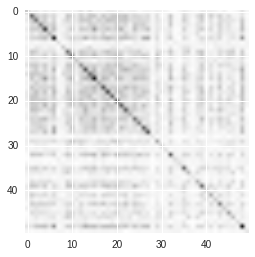

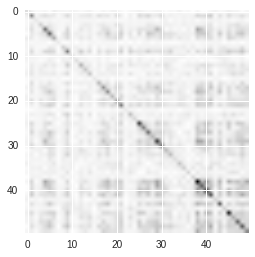

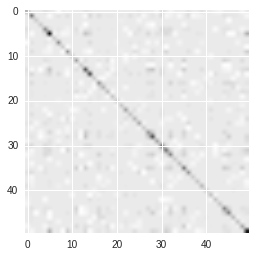

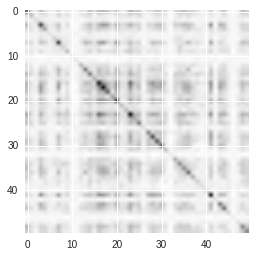

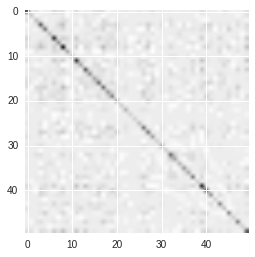

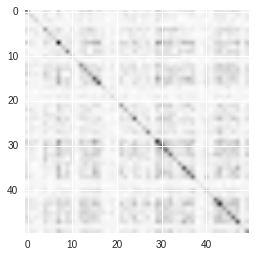

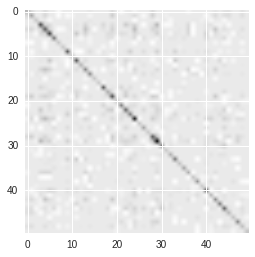

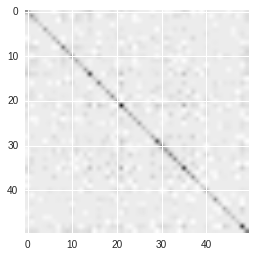

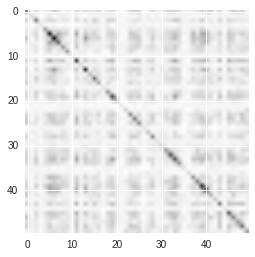

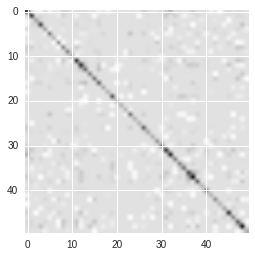

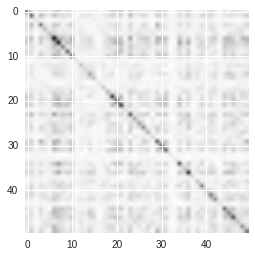

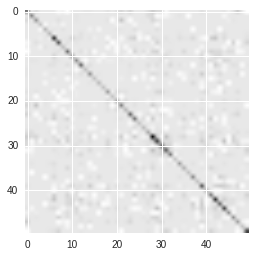

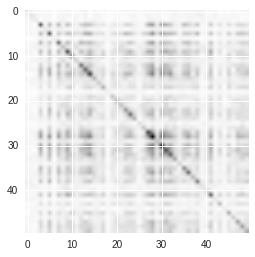

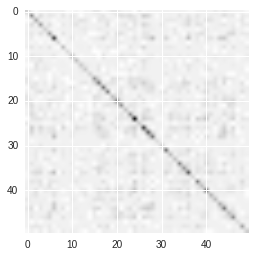

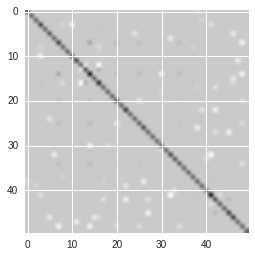

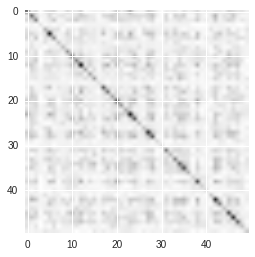

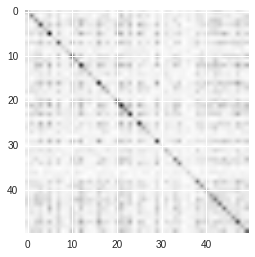

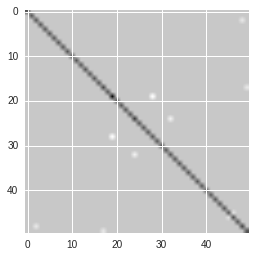

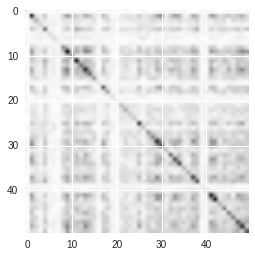

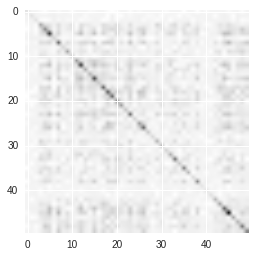

In [110]:
for i in range(20):
    plt.imshow(K[i])
    plt.show()

In [111]:
def fixed_point(k0):
    k2 = root(k0)
    r = 0
    for wi,ki in zip(W,K):
        r += wi*root(k2.dot(ki).dot(k2))
    return r

def w2_barycenter(k0):
    k2 = root(k0)
    r = 0
    for wi,ki in zip(W,K):
        r += wi*w2_cost(k0, ki, k2)**2
    return r

In [112]:
b_iter = np.zeros(niter)
w_iter = np.zeros(niter)

kn1 = np.eye(n)
for i in range(niter):
    kn = kn1
    kn1 = fixed_point(kn)
    w_iter[i] = w2_cost(kn, kn1)
    b_iter[i] = w2_barycenter(kn1)

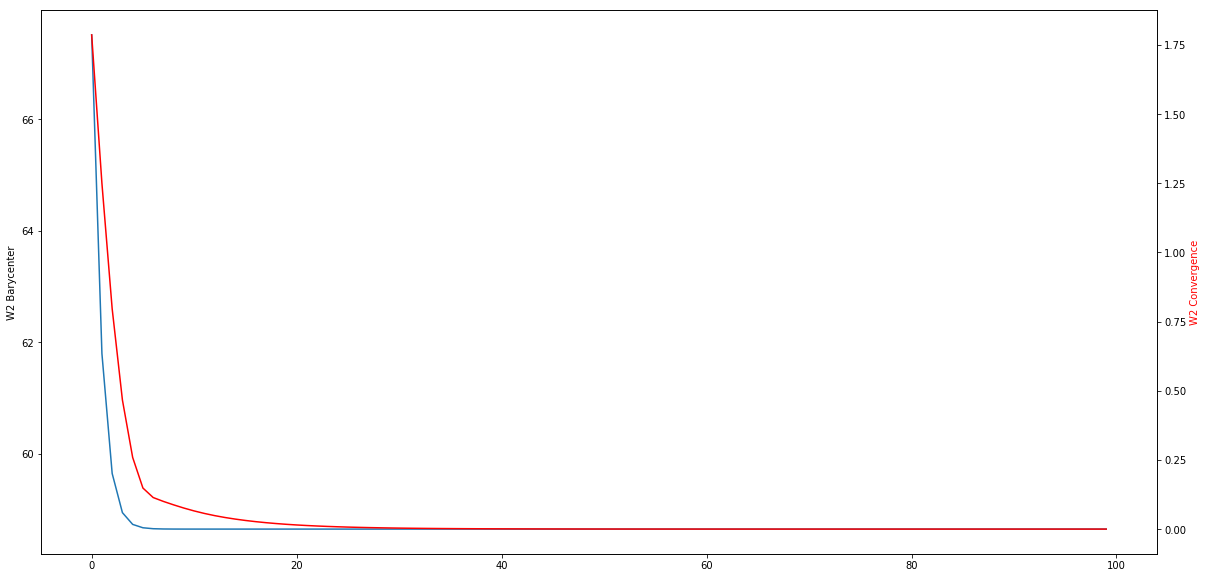

In [332]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('W2 Barycenter')
ax1.plot(b_iter)

ax2 = ax1.twinx()
ax2.set_ylabel('W2 Convergence', color='r')
ax2.plot(w_iter, 'r')

### Cantidad de matrices pareciera no afectar cantidad de iteraciones

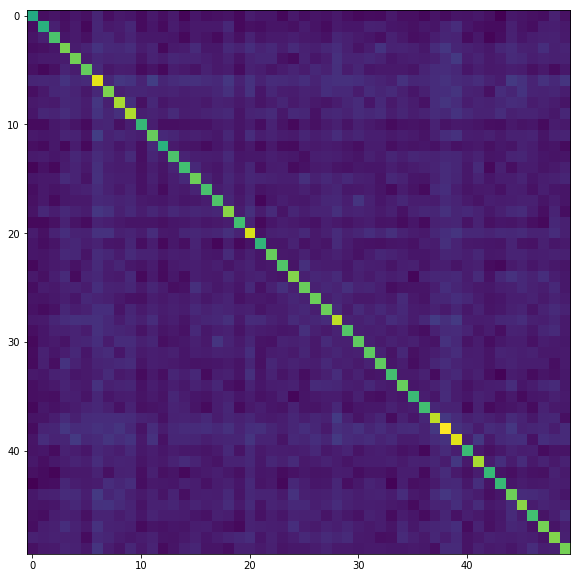

In [334]:
plt.figure(figsize=(10,10))
plt.imshow(kn1)

# Correlation Barycenter

In [335]:
corr(kn1)

array([[ 1.        ,  0.10675107,  0.12209932, ...,  0.08909594,
         0.16395962,  0.1030984 ],
       [ 0.10675107,  1.        ,  0.16506989, ...,  0.14699852,
         0.15040652,  0.13206575],
       [ 0.12209932,  0.16506989,  1.        , ...,  0.14918882,
         0.15095543,  0.12580168],
       ..., 
       [ 0.08909594,  0.14699852,  0.14918882, ...,  1.        ,
         0.1021149 ,  0.13625333],
       [ 0.16395962,  0.15040652,  0.15095543, ...,  0.1021149 ,
         1.        ,  0.14173949],
       [ 0.1030984 ,  0.13206575,  0.12580168, ...,  0.13625333,
         0.14173949,  1.        ]])

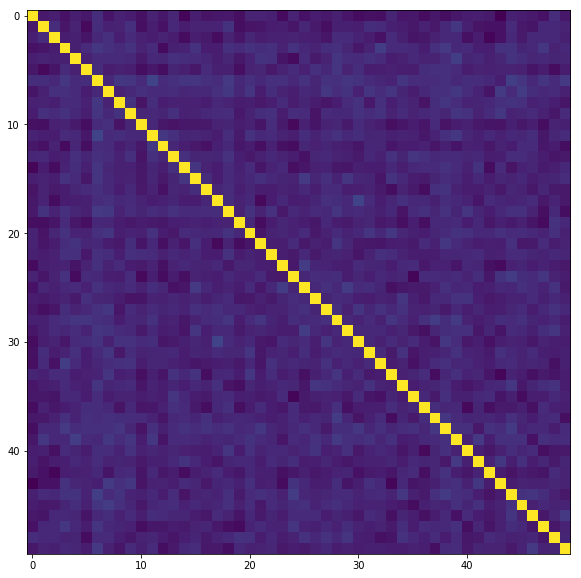

In [336]:
plt.figure(figsize=(10,10))
plt.imshow(corr(kn1))

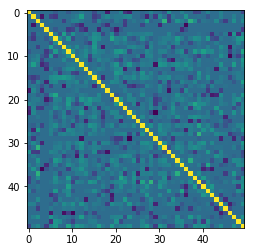

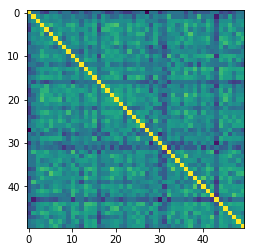

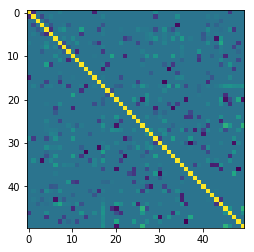

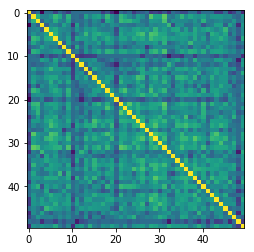

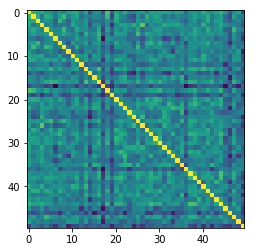

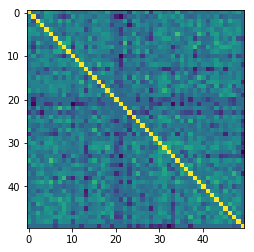

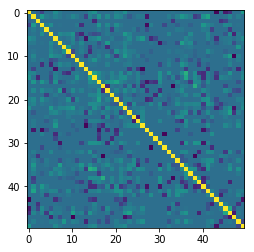

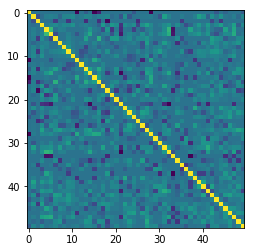

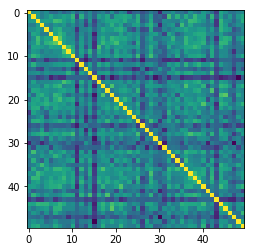

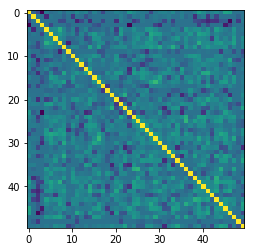

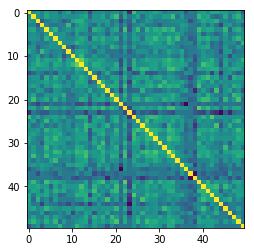

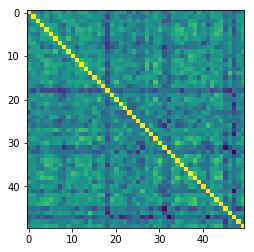

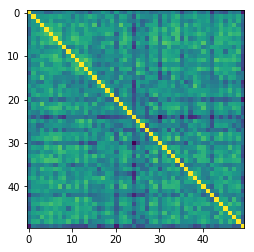

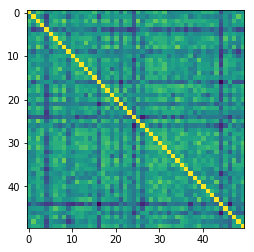

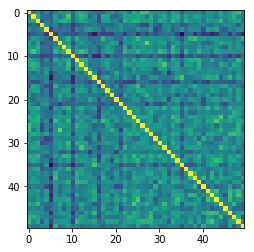

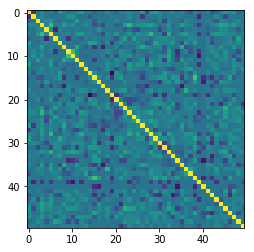

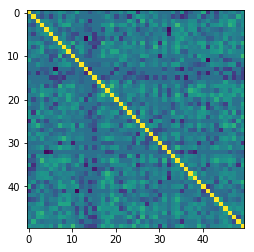

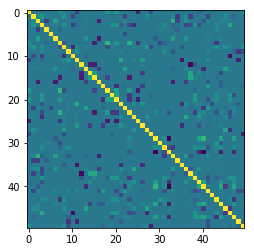

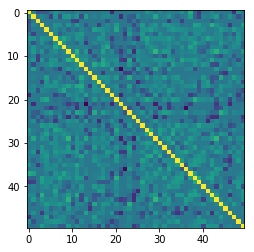

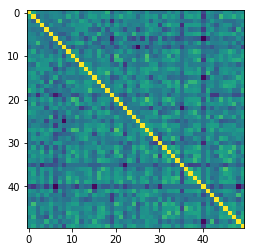

In [337]:
R = [corr(r) for r in K]
for i in range(20):
    plt.imshow(R[i])
    plt.show()

In [338]:
def fixed_point_r(r0):
    r2 = root(r0)
    res = 0
    for wi,ri in zip(W,R):
        res += wi*root(r2.dot(ri).dot(r2))
    return res

def w2_barycenter_r(r0):
    r2 = root(r0)
    res = 0
    for wi,ri in zip(W,R):
        res += wi*w2_cost(r0, ri, r2)**2
    return res

In [339]:
br_iter = np.zeros(niter)
wr_iter = np.zeros(niter)

rn1 = np.eye(n)
for i in range(niter):
    rn = rn1
    rn1 = fixed_point_r(rn)
    wr_iter[i] = w2_cost(rn, rn1)
    br_iter[i] = w2_barycenter_r(rn1)

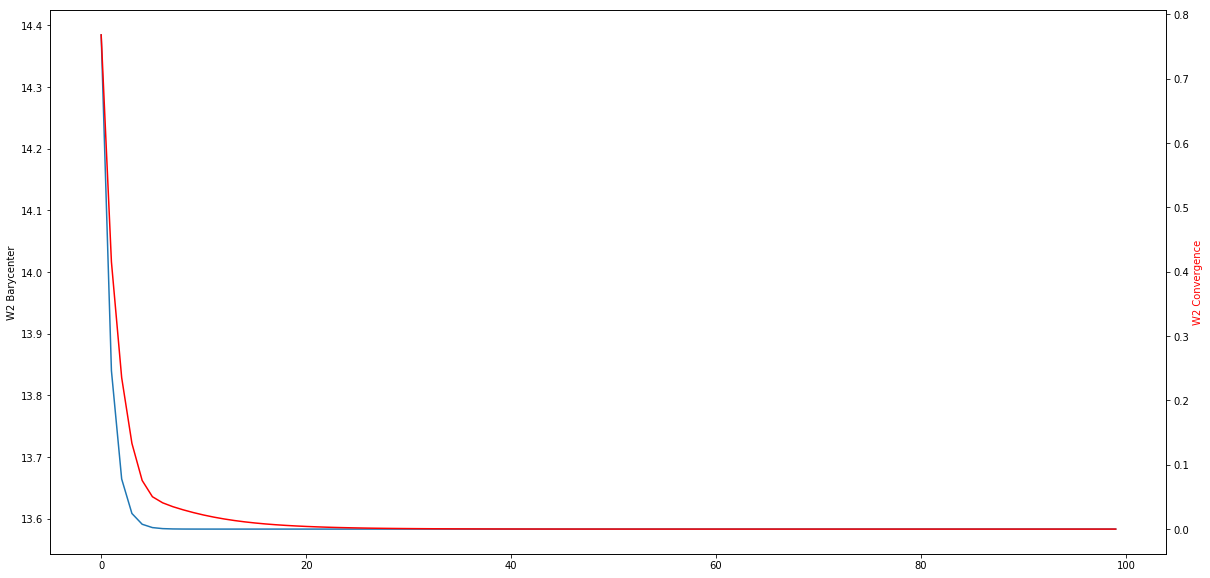

In [340]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('W2 Barycenter')
ax1.plot(br_iter)

ax2 = ax1.twinx()
ax2.set_ylabel('W2 Convergence', color='r')
ax2.plot(wr_iter, 'r')

In [341]:
rn1

array([[ 0.70532652,  0.03375666,  0.03745681, ...,  0.02234643,
         0.07715743,  0.0281504 ],
       [ 0.03375666,  0.73039695,  0.07022923, ...,  0.06200683,
         0.07620927,  0.05384702],
       [ 0.03745681,  0.07022923,  0.71311851, ...,  0.07111804,
         0.06647888,  0.04853025],
       ..., 
       [ 0.02234643,  0.06200683,  0.07111804, ...,  0.72170444,
         0.02644891,  0.05974025],
       [ 0.07715743,  0.07620927,  0.06647888, ...,  0.02644891,
         0.74876165,  0.06246527],
       [ 0.0281504 ,  0.05384702,  0.04853025, ...,  0.05974025,
         0.06246527,  0.71323757]])

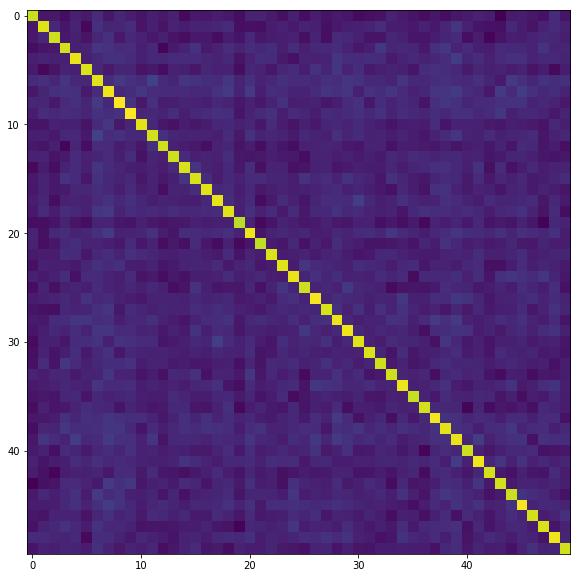

In [342]:
plt.figure(figsize=(10,10))
plt.imshow(rn1)

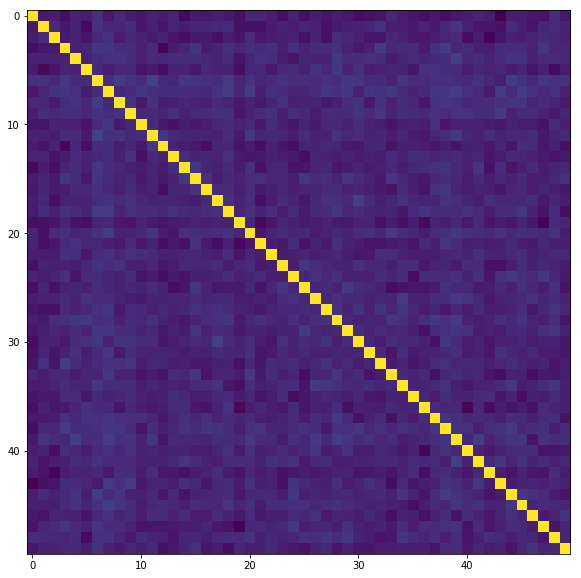

In [345]:
plt.figure(figsize=(10,10))
plt.imshow(corr(rn1))

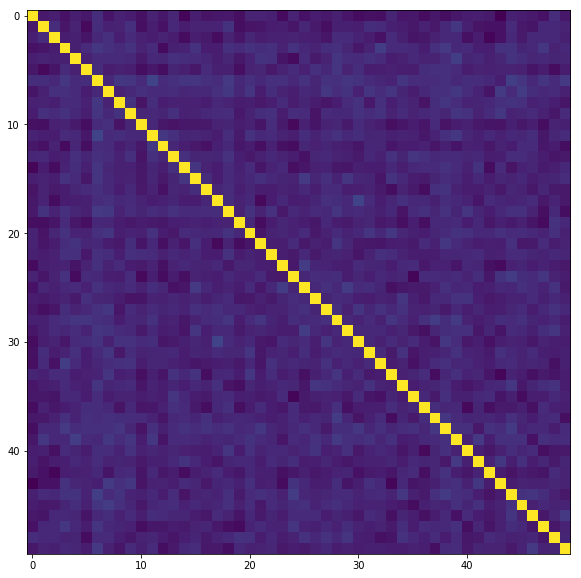

In [346]:
plt.figure(figsize=(10,10))
plt.imshow(corr(kn1))

In [353]:
def w2_pair_barycenter(K1, K2, w=(0.5,0.5), niter=15):
    r0 = np.eye(len(K1))
    for i in range(niter):
        r2 = root(r0)
        r0 = w[0]*root(r2.dot(K1).dot(r2))
        r0 += w[1]*root(r2.dot(K2).dot(r2))
    return r0

In [354]:
Rb

array([[ 1.  ,  0.99],
       [ 0.99,  1.  ]])

In [355]:
Rc

array([[ 1.    ,  0.9999],
       [ 0.9999,  1.    ]])

In [358]:
Bar = w2_pair_barycenter(Rb, Rc)
Bar

array([[ 0.99896521,  0.99593967],
       [ 0.99593967,  0.99896521]])

In [360]:
corr(Bar)

array([[ 1.        ,  0.99697133],
       [ 0.99697133,  1.        ]])

### Barycenter entre matrices de correlación NO es una matriz de correlación

In [361]:
w2_map(Bar, Rb).dot(Bar).dot(w2_map(Bar, Rb))

array([[ 1.  ,  0.99],
       [ 0.99,  1.  ]])

In [362]:
w2_map(Bar, Rc).dot(Bar).dot(w2_map(Bar, Rc))

array([[ 1.    ,  0.9999],
       [ 0.9999,  1.    ]])

In [363]:
w2_cost(Bar, Rb)**2+w2_cost(Bar, Rc)**2

0.0040561416310713749

In [364]:
Rb

array([[ 1.  ,  0.99],
       [ 0.99,  1.  ]])

In [365]:
def f(x):
    z = np.eye(2)
    z[0,1] = np.min([x,0.9999])
    z[1,0] = z[0,1]
    print(z)
    return w2_cost(z, Ra)**2+w2_cost(z, Rc)**2

In [370]:
sp.optimize.minimize(f, np.array([0.99]))

[[ 1.    0.99]
 [ 0.99  1.  ]]
[[ 1.          0.99000001]
 [ 0.99000001  1.        ]]
[[ 1.    0.99]
 [ 0.99  1.  ]]
[[ 1.   -0.02]
 [-0.02  1.  ]]
[[ 1.   -0.02]
 [-0.02  1.  ]]
[[ 1.         -0.01999999]
 [-0.01999999  1.        ]]
[[ 1.          0.69633975]
 [ 0.69633975  1.        ]]
[[ 1.          0.69633975]
 [ 0.69633975  1.        ]]
[[ 1.          0.69633976]
 [ 0.69633976  1.        ]]
[[ 1.          0.73166562]
 [ 0.73166562  1.        ]]
[[ 1.          0.73166562]
 [ 0.73166562  1.        ]]
[[ 1.          0.73166563]
 [ 0.73166563  1.        ]]
[[ 1.          0.80912824]
 [ 0.80912824  1.        ]]
[[ 1.          0.80912824]
 [ 0.80912824  1.        ]]
[[ 1.          0.80912826]
 [ 0.80912826  1.        ]]
[[ 1.          0.89178242]
 [ 0.89178242  1.        ]]
[[ 1.          0.89178242]
 [ 0.89178242  1.        ]]
[[ 1.          0.89178244]
 [ 0.89178244  1.        ]]
[[ 1.          0.85466796]
 [ 0.85466796  1.        ]]
[[ 1.          0.85466796]
 [ 0.85466796  1.       

      fun: 0.2653211329039984
 hess_inv: array([[ 0.13323105]])
      jac: array([ -6.03497028e-06])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 8
     njev: 10
   status: 0
  success: True
        x: array([ 0.86246789])

In [371]:
w2_pair_barycenter(Ra, Rc)

array([[ 0.93475894,  0.80619036],
       [ 0.80619036,  0.93475894]])

In [372]:
corr(w2_pair_barycenter(Ra, Rc))

array([[ 1.        ,  0.86245803],
       [ 0.86245803,  1.        ]])

### Pregunta: Baricentro = Baricentro Copulas + Baricentro Marginales ?

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.

Total: 309 | Obs: 61 (19.741100323624597%)


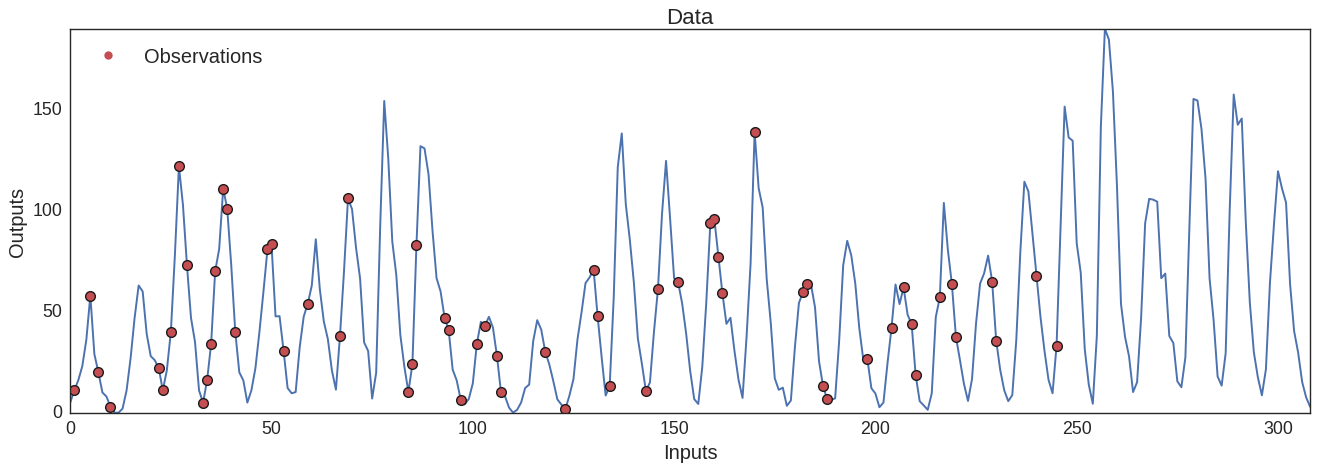

In [65]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import g3py as g3


g3.style_normal()
g3.style_widget()
x, y = g3.data_sunspots()

psamples = 0.25

obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, psamples, 0.8, plot=True)

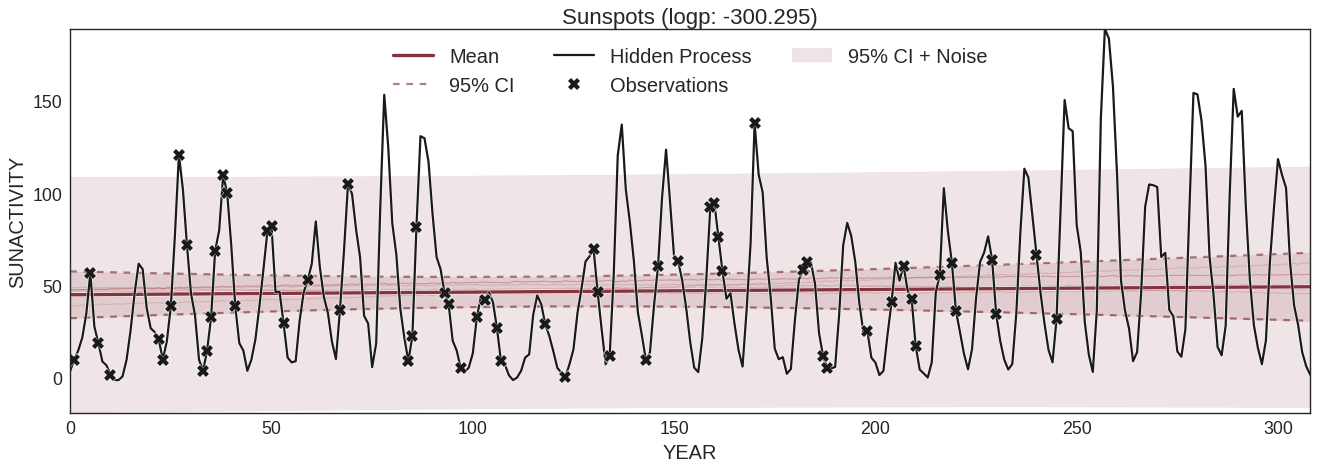

In [66]:
gp = g3.GaussianProcess(space=x, location=g3.Bias(), kernel=g3.SINC(), noisy=True)
gp.describe('Sunspots', 'YEAR', 'SUNACTIVITY')
gp.observed(inputs=x_obs, outputs=y_obs, hidden=y)
gp.plot(samples=5)

In [69]:
gp.widget()

'Starting function value (-logp): 344.54'
'start_bfgs'
         Current function value: 286.449615
         Iterations: 15
         Function evaluations: 100
         Gradient evaluations: 88
'find_MAP'
{'GP_Bias_Bias': array(44.20368576049805, dtype=float32),
 'GP_Noise_var_log__': array(4.912644863128662, dtype=float32),
 'GP_SINC_freq_log__': array([-0.25559399], dtype=float32),
 'GP_SINC_rate_log__': array([-1.40282369], dtype=float32),
 'GP_SINC_var_log__': array(6.895542144775391, dtype=float32)}


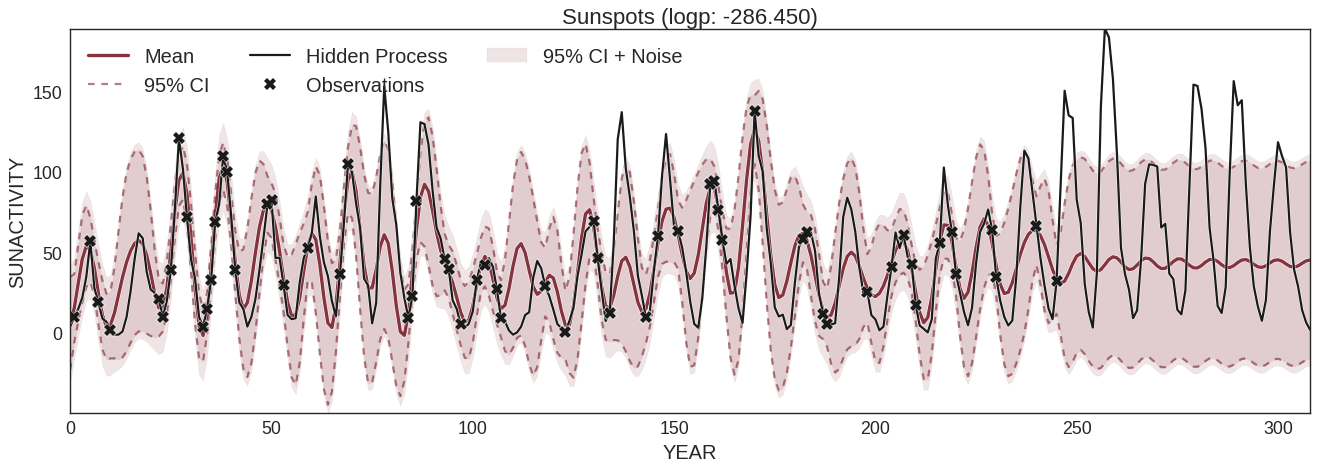

In [86]:
p = gp.find_MAP(gp.params_widget)
gp.plot(p)

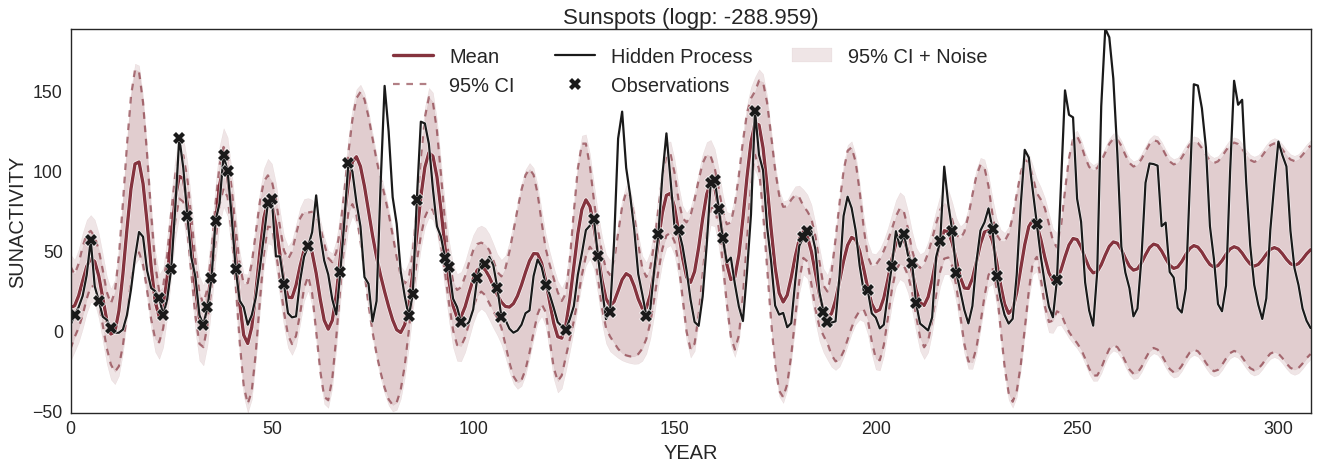

In [77]:
from numpy import array, float32
p = {'GP_Bias_Bias': array(47.57565689086914, dtype=float32),
 'GP_Noise_var_log__': array(4.744483947753906, dtype=float32),
 'GP_SINC_freq_log__': array([-0.4556672], dtype=float32),
 'GP_SINC_rate_log__': array([-2.18274999], dtype=float32),
 'GP_SINC_var_log__': array(7.015056610107422, dtype=float32)}
gp.plot(p)

In [28]:
gp.kernel(p)

array([[         nan, -15.14226627, -14.64912224, ...,  -9.44016457,
        -10.0987339 , -10.74554157],
       [-15.142272  ,          nan, -14.21964169, ...,  -9.06363392,
         -9.69598484, -10.3170414 ],
       [-14.64911652, -14.21962833,          nan, ...,  -8.67130566,
         -9.27632904,  -9.87055111],
       ..., 
       [ -9.44016647,  -9.06364155,  -8.6713047 , ...,          nan,
         -8.74235058,  -9.13906479],
       [-10.09873772,  -9.69599342,  -9.27633095, ...,  -8.74234867,
                 nan,  -9.60089016],
       [-10.74554157, -10.3170433 ,  -9.87054443, ...,  -9.13906097,
         -9.60089016,          nan]], dtype=float32)

In [56]:
datatrace = gp.sample_hypers(samples=5000, chains=10)
datatrace

Sampling 4 variables, 10 chains, 5000 times (None temps)


100%|██████████| 5000/5000 [01:59<00:00, 41.79it/s]


GP_Noise_var_log__  GP_SE_rate_log____0  GP_SE_var_log__  GP_Bias_Bias  \
0                7.605362            -2.741308         6.548507     54.086464   
1                7.605362            -2.741308         6.548507     54.086464   
2                7.605362            -2.741308         6.548507     54.086464   
3                7.730970            -3.166900         6.527177     50.987517   
4                7.731293            -3.607886         6.743125     52.217901   
5                7.592245            -2.958518         6.664063     54.382962   
6                7.364273            -3.027917         6.218296     58.516849   
7                7.364273            -3.027917         6.218296     58.516849   
8                7.364273            -3.027917         6.218296     58.516849   
9                7.394554            -3.051002         6.440258     58.521286   
10               7.394554            -3.051002         6.440258     58.521286   
11               7.386505            -3.060255         6.459550     58.598409   
12               7.375913            -3.016684         6.363477     58.602083   
13               7.375913            -3.016684         6.363477     58.602083   
14               7.375913            -3.016684         6.363477     58.602083   
15               7.375913            -3.016684         6.363477     58.602083   
16               7.375913            -3.016684         6.363477     58.602083   
17               7.375913            -3.016684         6.363477     58.602083   
18               7.384898            -2.891474         6.757484     53.315075   
19               7.385178            -2.887574         6.769755     53.150410   
20               7.379111            -2.841236         6.688955     51.832573   
21               7.379111            -2.841236         6.688955     51.832573   
22               7.377433            -2.841377         6.700259     51.886283   
23               7.377433            -2.841377         6.700259     51.886283   
24               7.377433            -2.841377         6.700259     51.886283   
25               7.252974            -2.851875         7.538736     55.870338   
26               7.252974            -2.851875         7.538736     55.870338   
27               7.250270            -2.850453         7.618688     55.323692   
28               7.250270            -2.850453         7.618688     55.323692   
29               7.268408            -3.041421         7.656553     57.297522   
...                   ...                  ...              ...           ...   
49970            4.544686            -0.757060         7.523095     49.678355   
49971            4.544686            -0.757060         7.523095     49.678355   
49972            4.544686            -0.757060         7.523095     49.678355   
49973            4.544686            -0.757060         7.523095     49.678355   
49974            4.544686            -0.757060         7.523095     49.678355   
49975            4.544686            -0.757060         7.523095     49.678355   
49976            4.544686            -0.757060         7.523095     49.678355   
49977            4.544686            -0.757060         7.523095     49.678355   
49978            4.544686            -0.757060         7.523095     49.678355   
49979            4.544686            -0.757060         7.523095     49.678355   
49980            4.459957            -0.718723         7.491509     52.763219   
49981            4.459957            -0.718723         7.491509     52.763219   
49982            4.431839            -0.706000         7.481027     53.786983   
49983            4.594444            -0.779573         7.541644     47.866771   
49984            6.241245            -0.913163         7.563045     49.240135   
49985            4.416814            -0.765164         7.539336     47.718635   
49986            4.461617            -0.709618         7.590329     53.471743   
49987            4.461617            -

In [60]:
datatrace._burnin = datatrace._niter > 1000

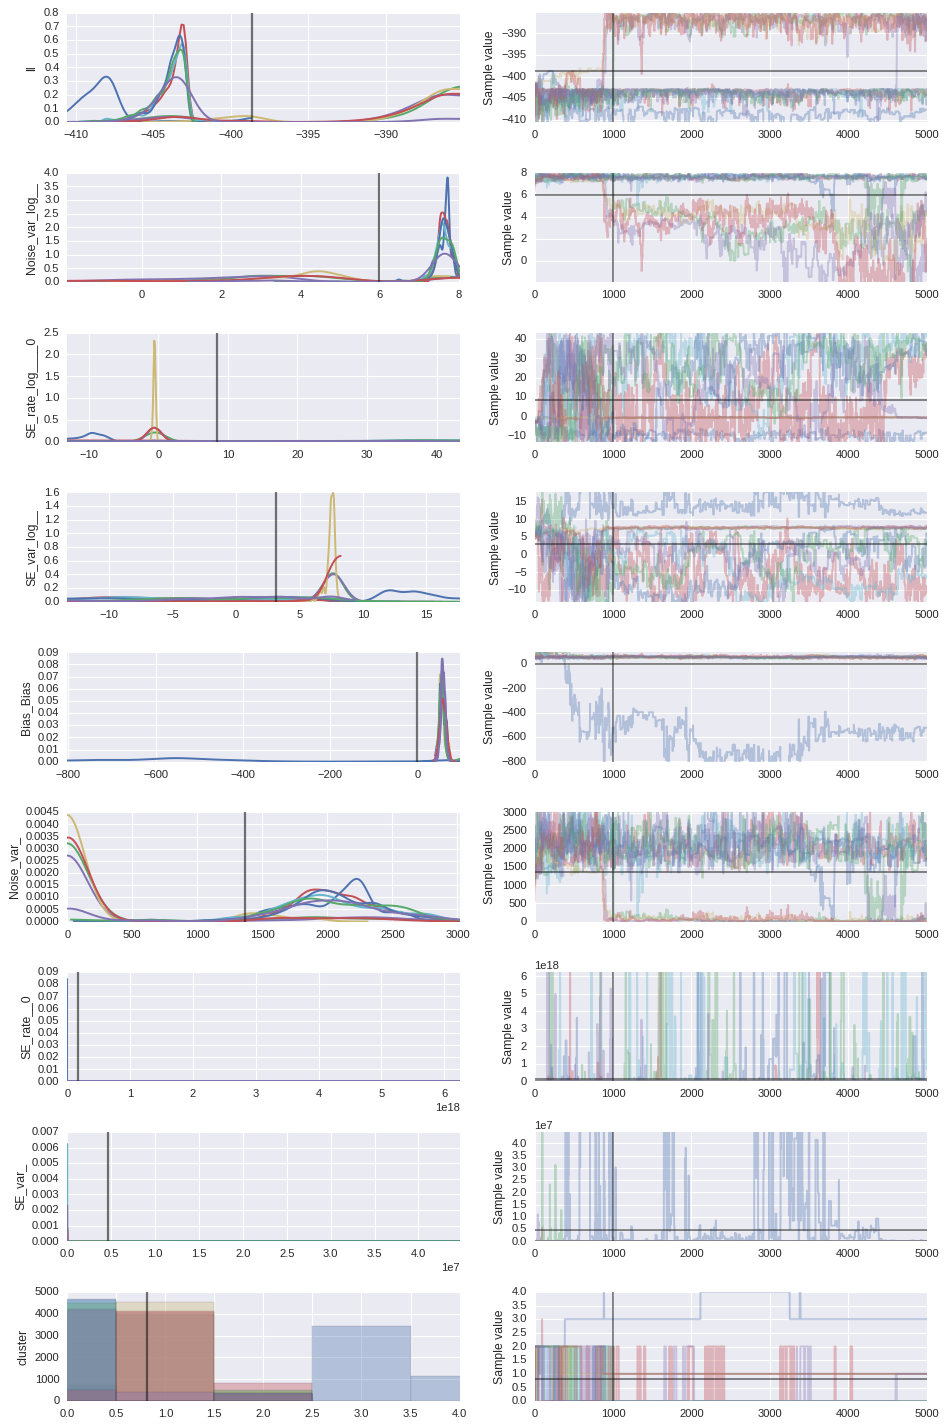

In [61]:
g3.style_seaborn()
g3.plot_datatrace(datatrace)

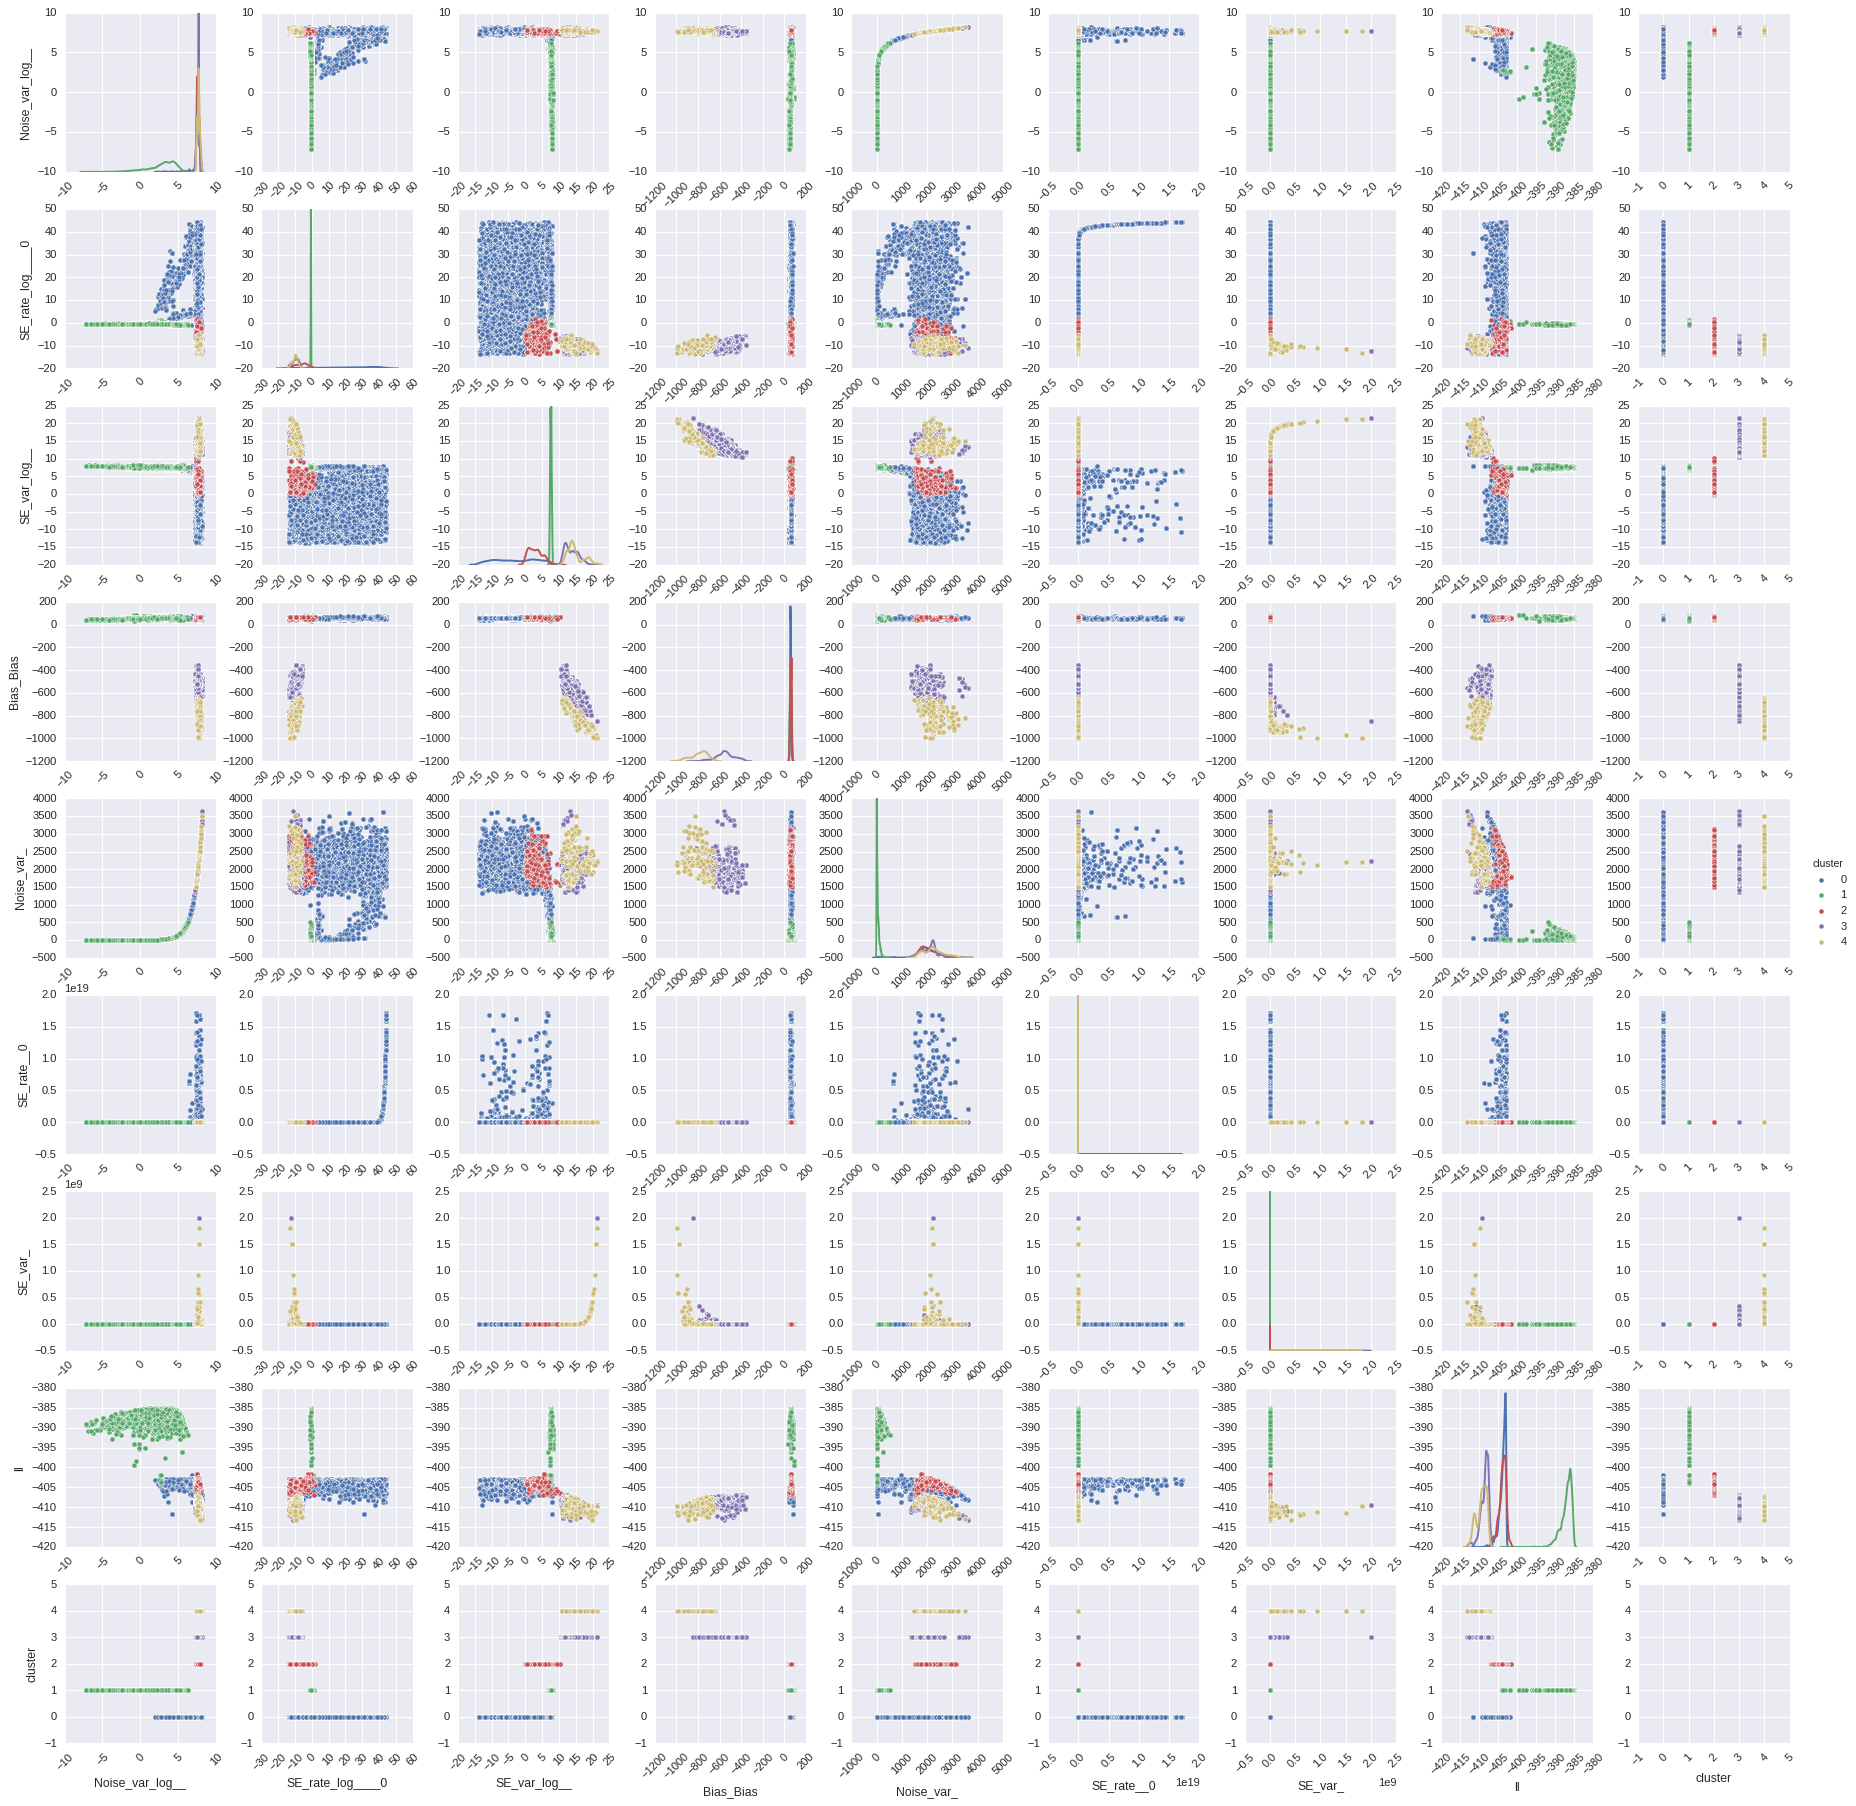

In [63]:
g3.scatter_datatrace(datatrace)

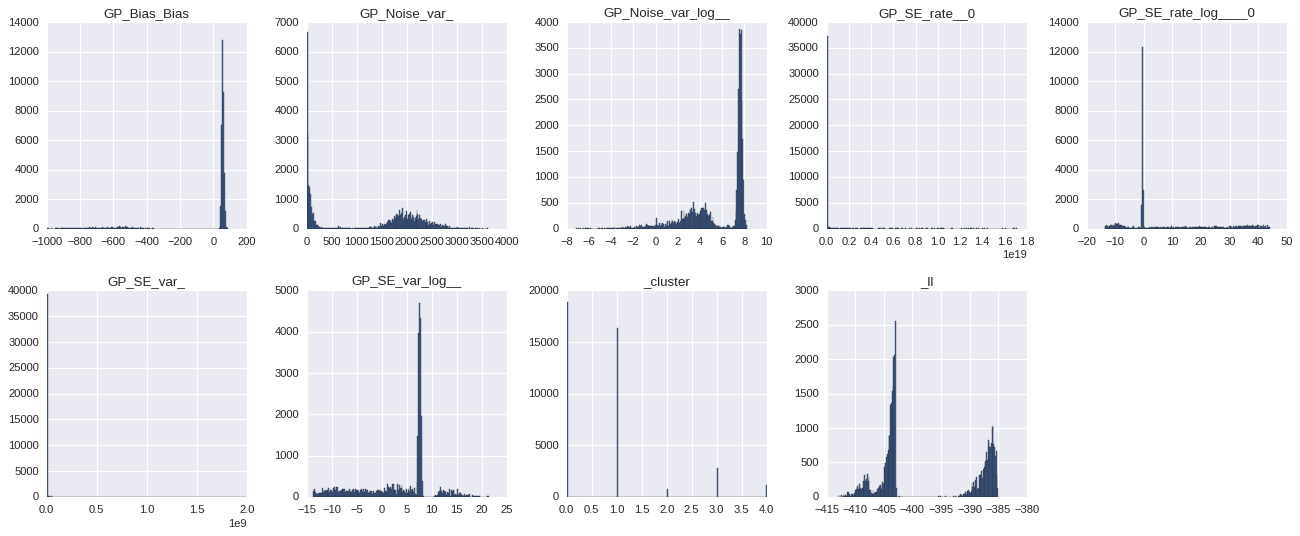

In [62]:
g3.hist_datatrace(datatrace)

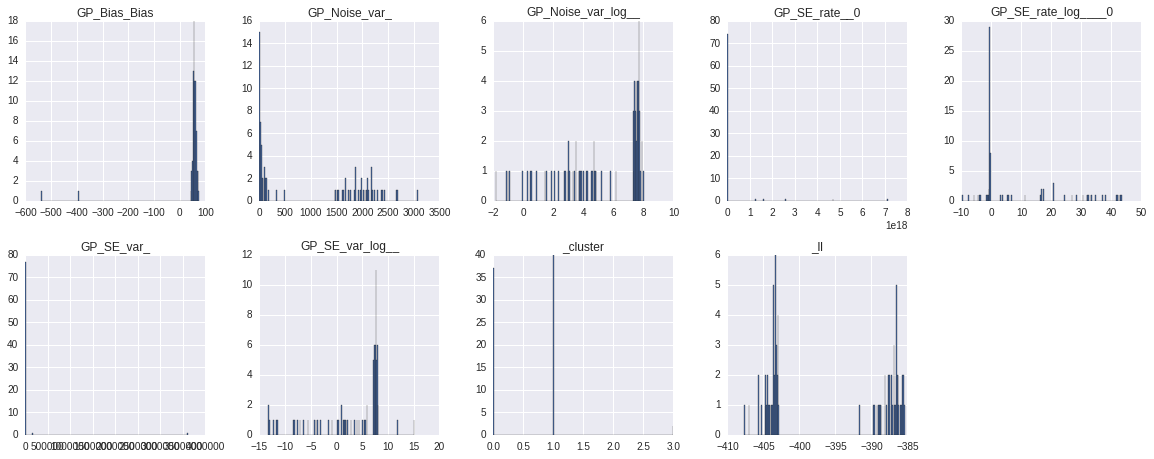

In [287]:
dt = datatrace[datatrace._ll > -408].sample(100)
g3.hist_datatrace(dt)

In [288]:
dt

GP_Noise_var_log__  GP_SE_rate_log____0  GP_SE_var_log__  GP_Bias_Bias  \
42410            4.231023            -0.645740         7.930750     75.684256   
17073            3.409274            -0.419080         7.290126     59.599024   
22700            4.815625            -0.643757         8.018446     46.039156   
45970            7.484851            43.115108         5.351959     49.250298   
24292            0.265009            -0.464233         7.461221     51.481948   
27894            7.402519            -5.881176       -13.317005     52.752919   
19296            0.432484            -0.433743         7.802053     59.406668   
16818            3.046461            -0.576830         7.988511     68.988784   
36116            7.479364            17.303948        -5.557788     59.526898   
15084            7.976507            -4.053436         3.922026     55.393689   
49630            3.815889            -0.385728         7.479194     62.802353   
41265            4.677541            -0.636343         7.826010     61.454936   
32344            7.773817            11.099629       -13.107279     56.885013   
43390            5.168669            -1.099287         7.997133     56.327948   
15106            7.788027             6.336241         3.050414     52.626094   
21404            4.858993            -0.620796         7.434014     51.381630   
49090            7.457842            28.363304        -0.900296     64.904247   
35941            7.552442            34.672072       -13.785376     59.775371   
33612            7.320856            41.642613         2.759398     56.822357   
25465            7.636575            11.285238         0.564498     52.556672   
25706            7.539605            12.339913        -3.241029     65.457462   
6644             4.578527            -0.539453         7.575321     55.322380   
14761            7.685098            33.355595        -7.077757     57.358423   
49576            6.175603             3.758370         7.591628     61.354497   
14471            7.528703             5.635438       -12.187495     47.270549   
1381             7.525539            -7.641561        11.888134   -394.811260   
35967            7.448088            27.013292        -7.833610     56.284732   
16134            2.709148            -0.493959         7.419725     64.375333   
35470            7.814888            -3.077200         5.946283     55.586438   
23553            3.017958            -0.581923         7.699762     71.907522   
...                   ...                  ...              ...           ...   
130              7.297937            -0.290915         6.400317     56.839866   
15327            7.362477            18.504904       -10.841316     56.788496   
43294            4.027813            -0.693047         7.607885     61.516598   
26949            7.560747            31.812846         1.408953     63.574943   
16841            3.508536            -0.616837         7.787500     63.943138   
11078            7.598726            -3.928692        -3.784714     52.269621   
5096             7.555776             4.883136         4.741892     65.434347   
47207            7.715790            20.667369         3.460446     56.295432   
30025            7.564663            -2.825585         5.438893     45.892858   
9757            -0.929838            -0.275240         7.444355     43.801762   
34648            7.657462            33.215979         5.013518     51.561839   
22627            3.762256            -0.664375         7.624004     53.230558   
40066            7.487555             5.926699        -6.287903     66.492400   
8122             1.882741            -0.436538         7.402799     45.915633   
42754            3.505052            -0.429069         7.609709     67.706791   
17162            2.066772            -0.427165         7.260848     57.595789   
37644            7.347382            24.387250         1.598186     57.462745   
27631            7.779607             

In [289]:
g3.find_candidates(dt)

GP_Noise_var_log__  GP_SE_rate_log____0  GP_SE_var_log__  GP_Bias_Bias  \
ll1            3.987538            -0.486369         7.623682     61.040118   
ll2            7.297937            -0.290915         6.400317     56.839866   
ll0            7.649601            17.170078        -6.488015     59.265738   
ll3            7.773923            -8.961938        11.638621    -10.554447   

     GP_Noise_var_  GP_SE_rate__0     GP_SE_var_  _nchain  _niter  _burnin  \
ll1      53.921963   6.148546e-01    2046.082031        8     911    False   
ll2    1477.249146   7.475792e-01     602.035950        0     130    False   
ll0    2099.808594   2.863322e+07       0.001522        5    3701     True   
ll3    2377.780762   1.281976e-04  113393.617188        0     435    False   

     _outlayer         _ll  _cluster  
ll1       True -385.365753         1  
ll2       True -399.410980         2  
ll0       True -402.899109         0  
ll3       True -406.941101         3

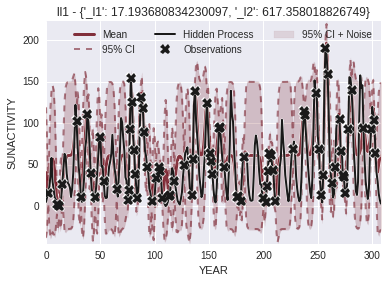

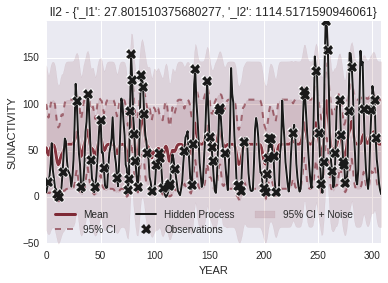

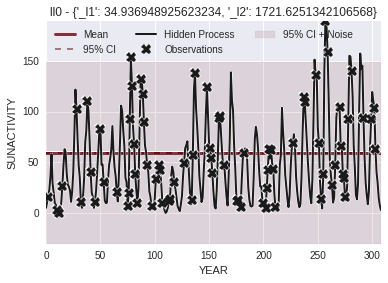

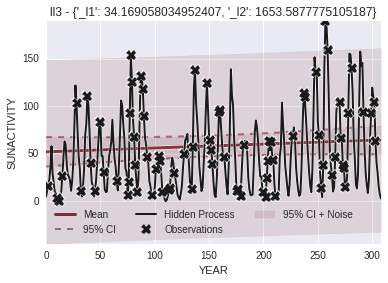

In [290]:
gp.plot_datatrace(g3.find_candidates(dt))

In [291]:
params = [gp.params_datatrace(dt, iloc=i) for i in range(len(dt))]

/home/grios/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


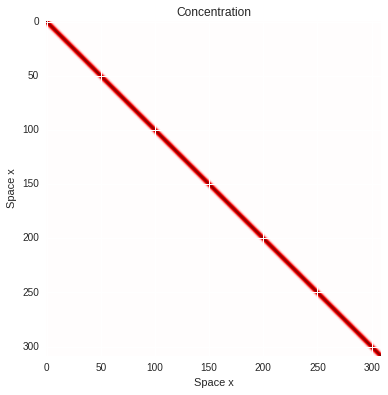

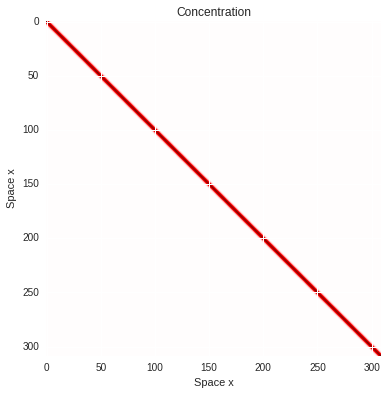

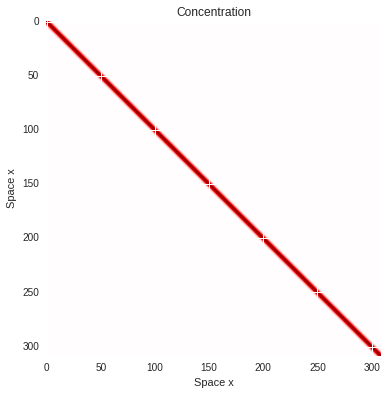

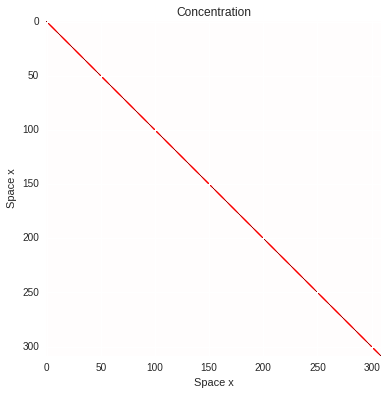

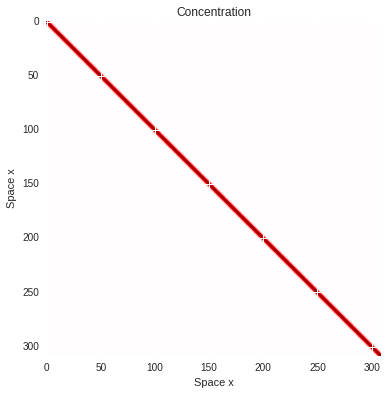

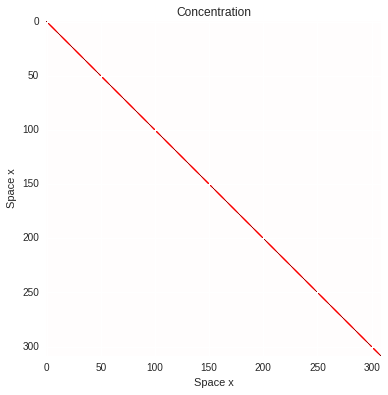

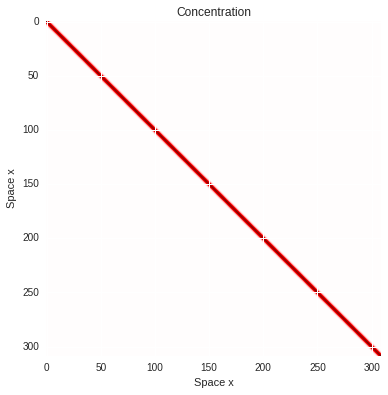

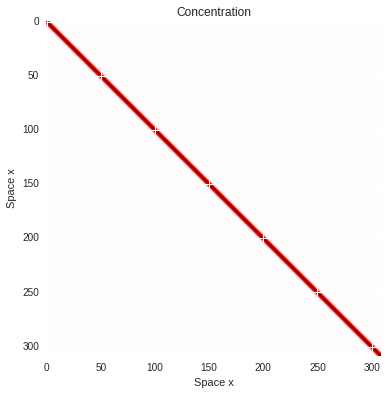

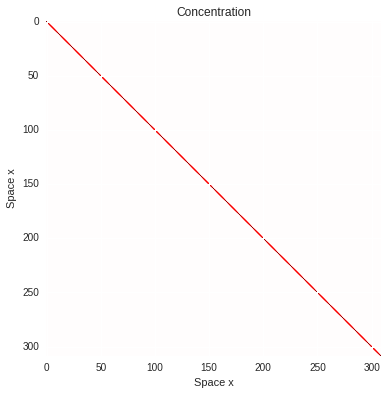

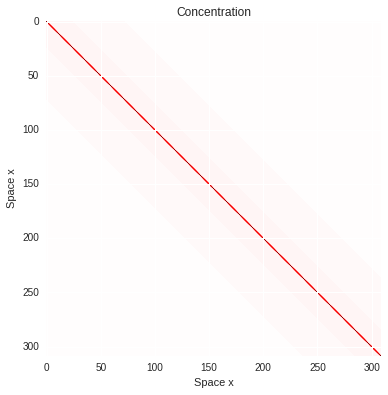

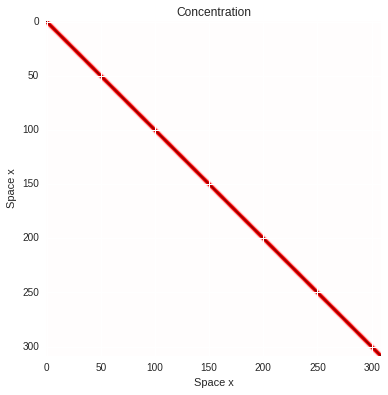

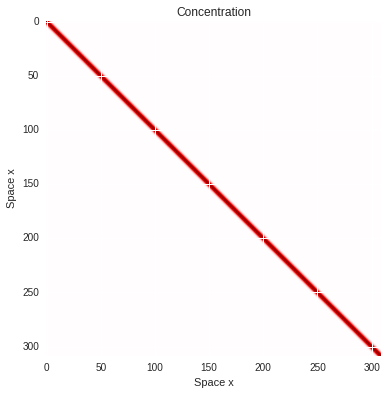

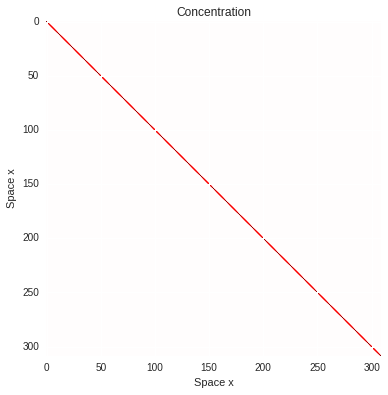

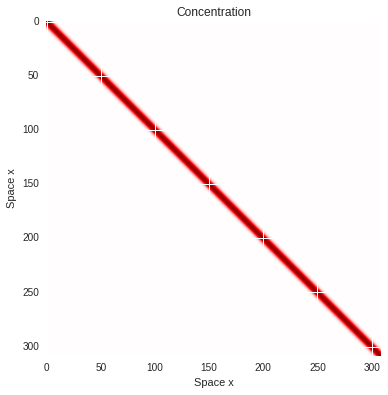

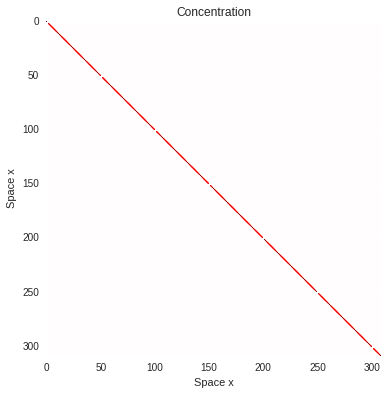

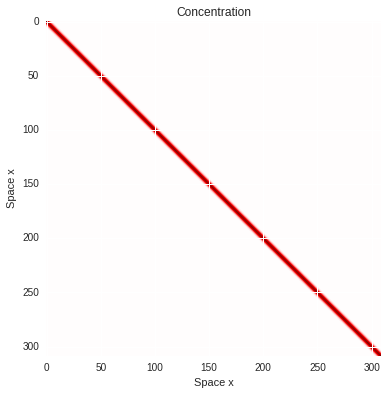

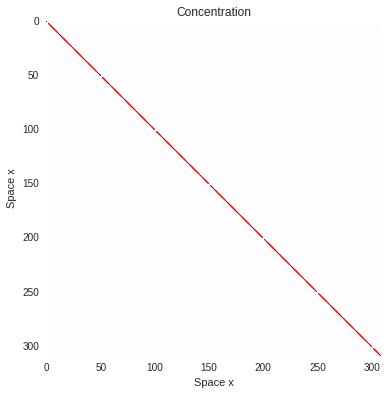

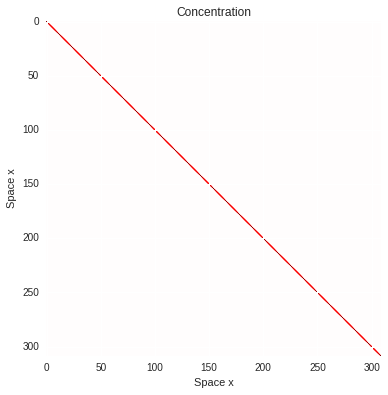

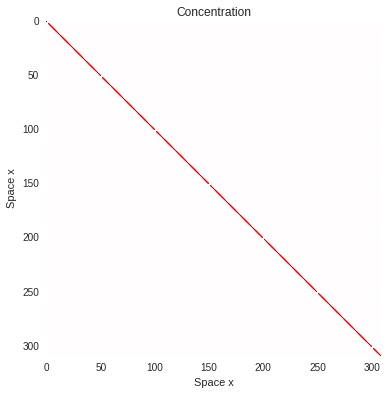

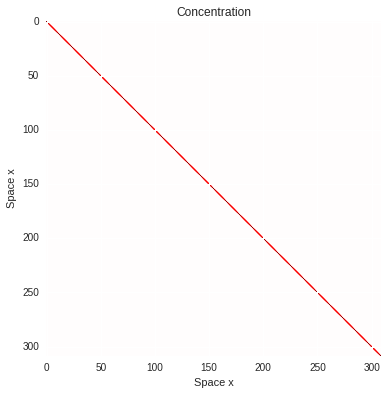

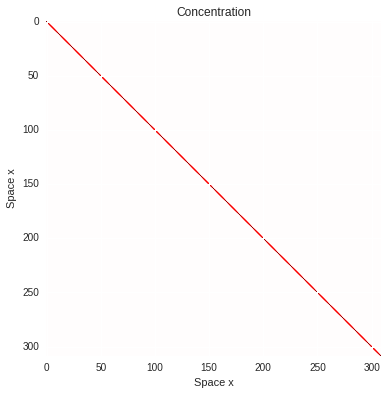

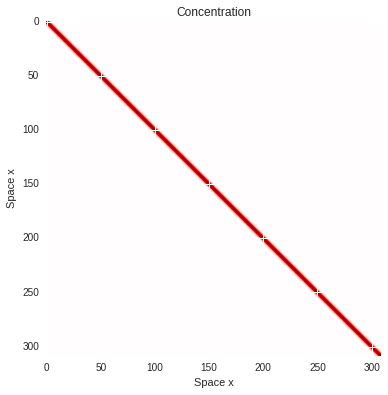

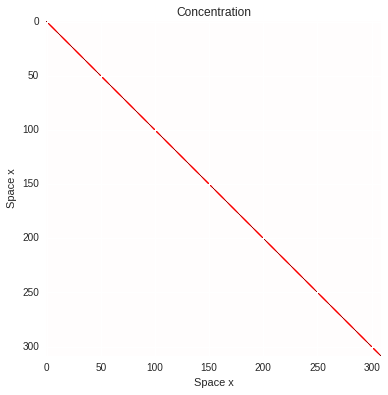

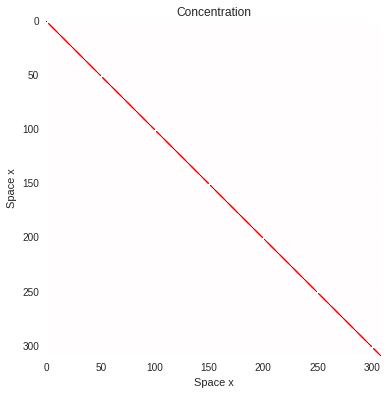

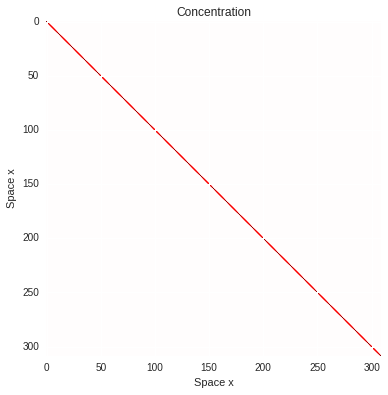

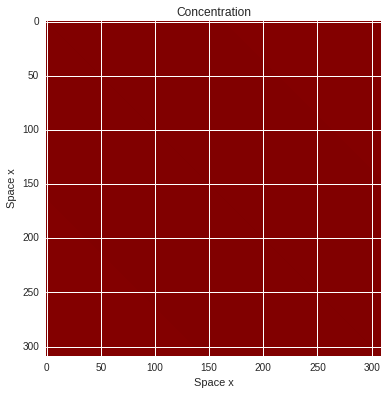

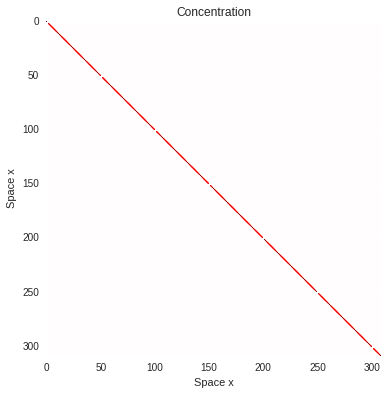

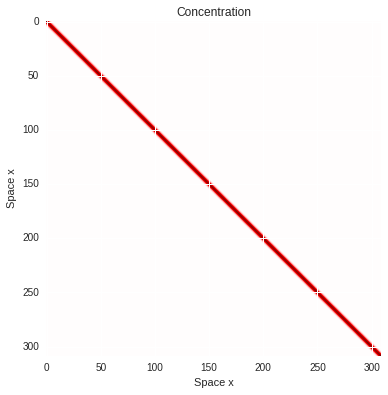

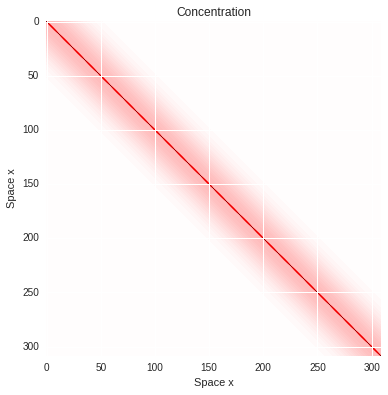

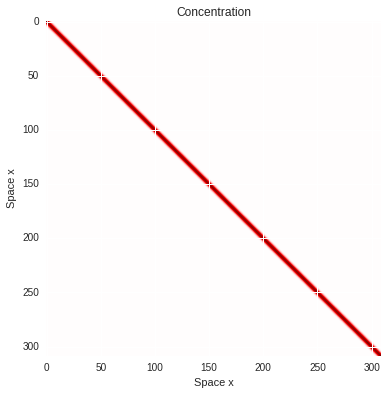

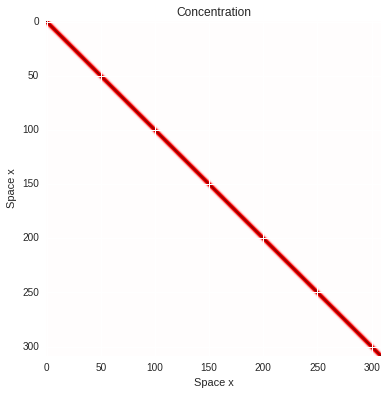

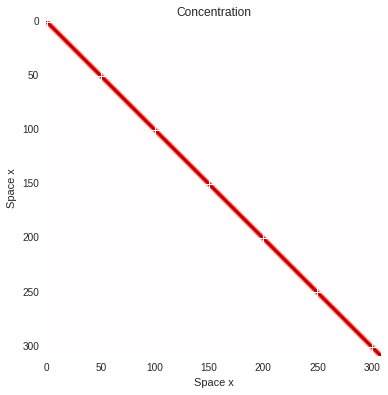

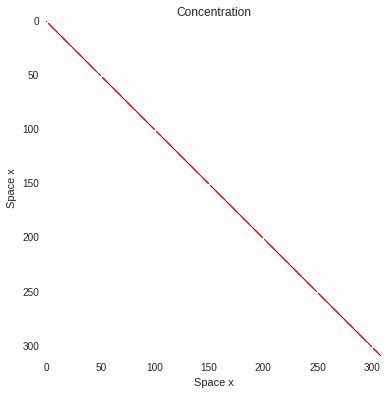

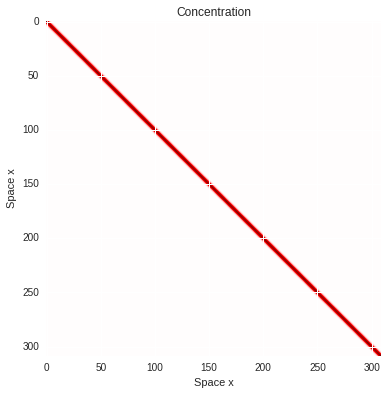

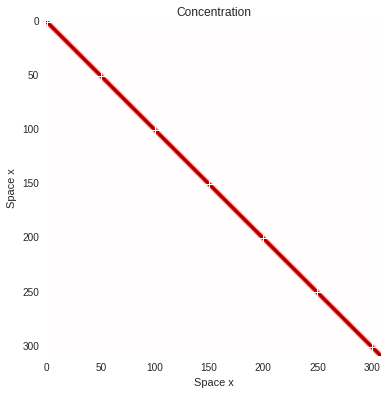

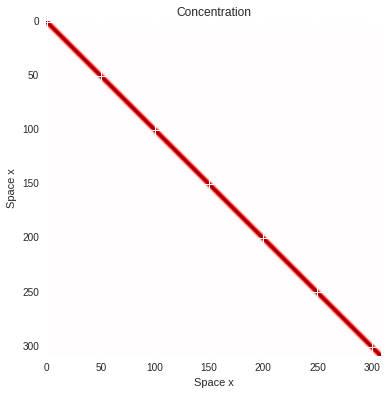

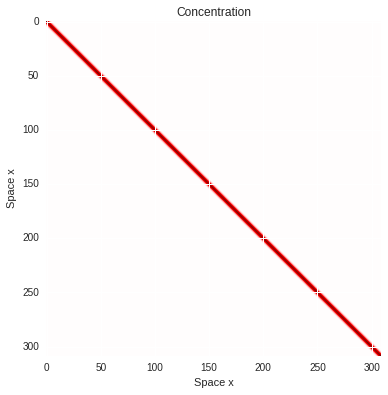

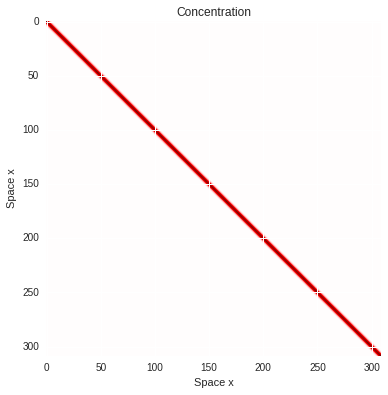

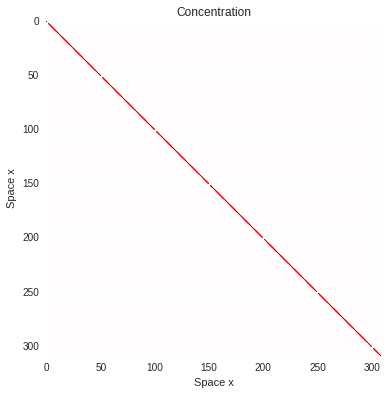

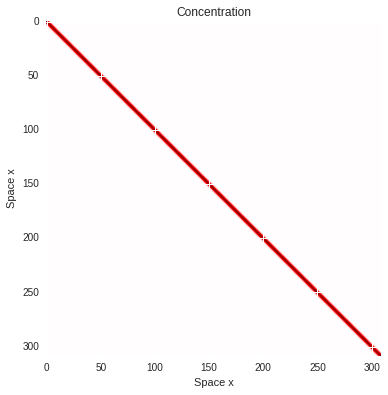

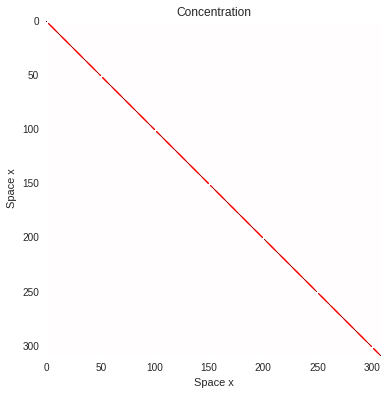

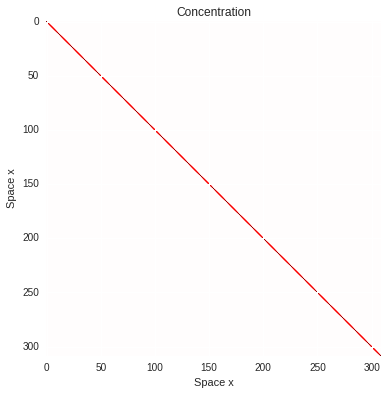

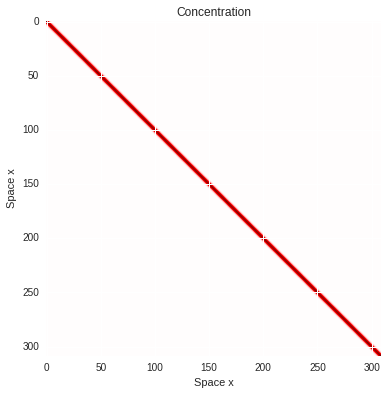

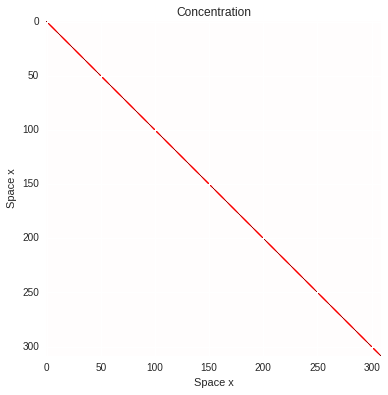

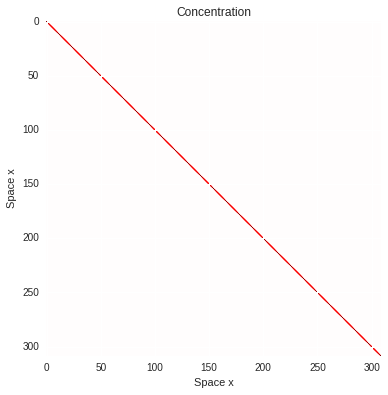

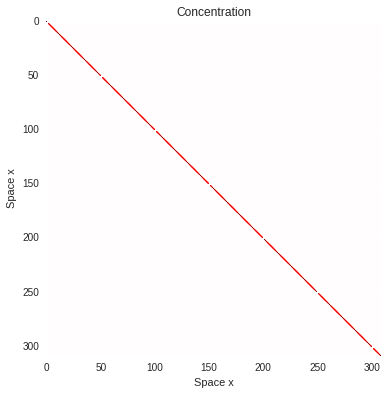

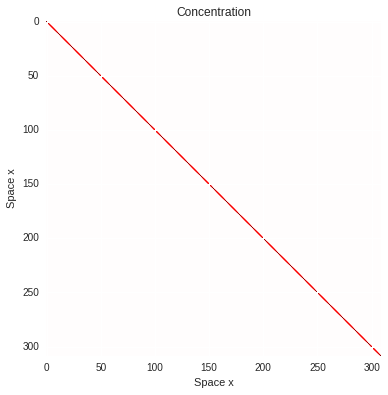

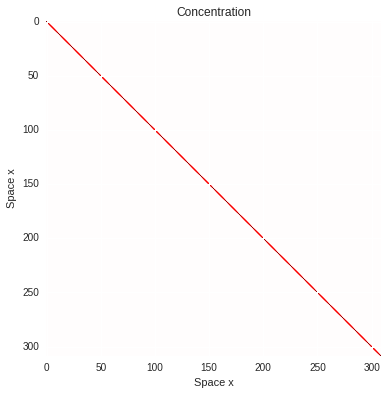

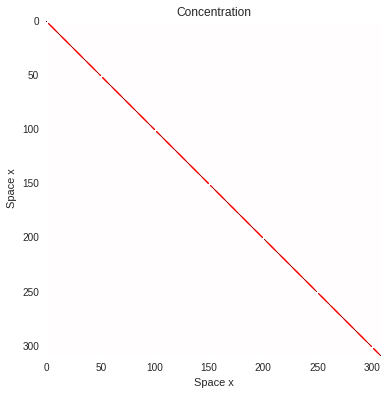

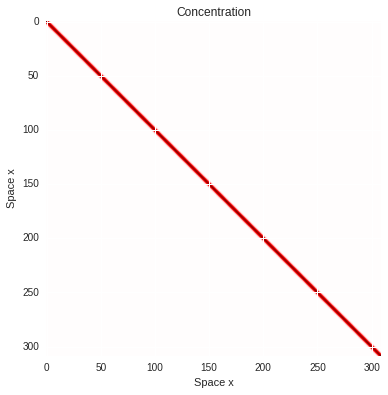

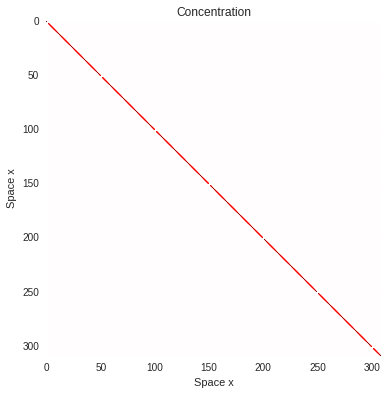

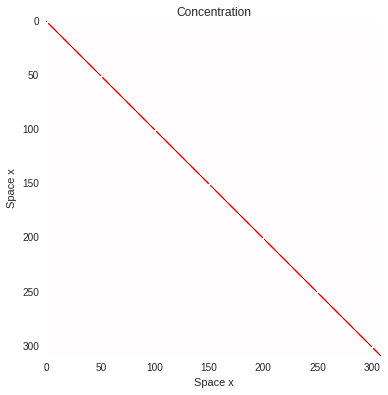

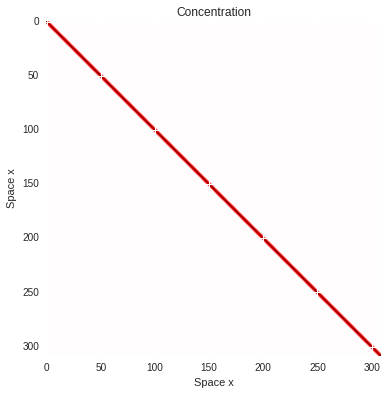

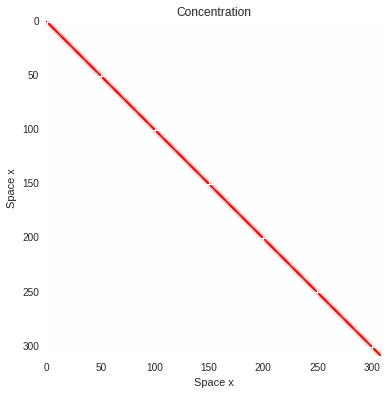

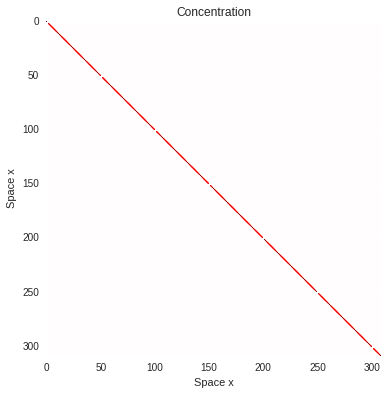

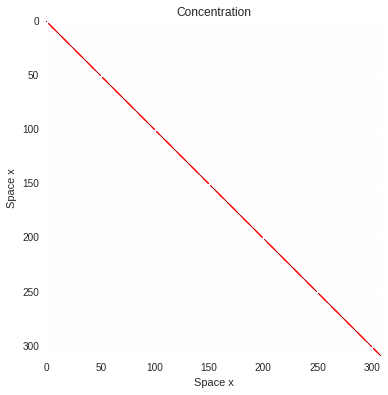

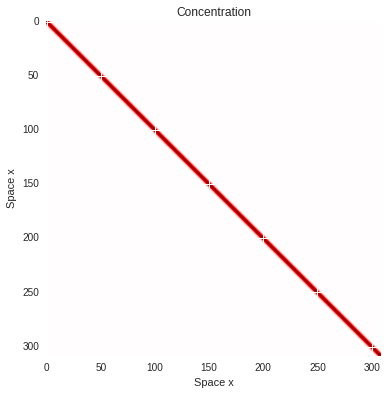

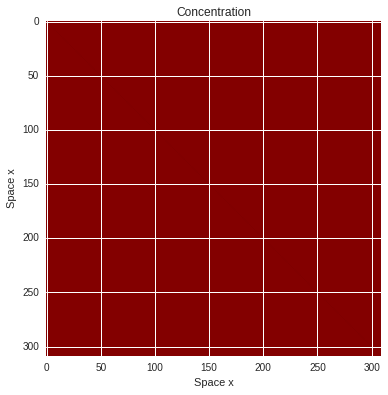

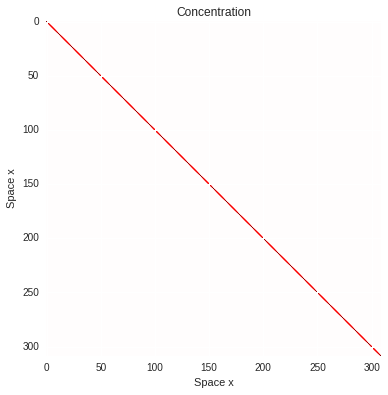

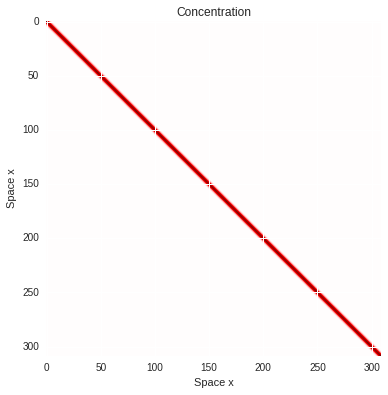

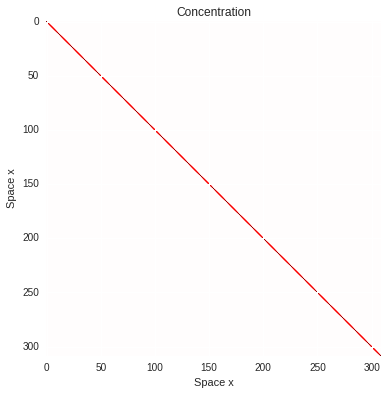

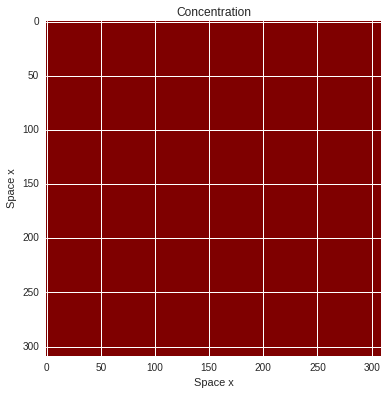

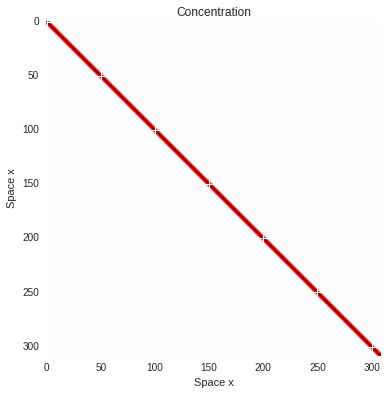

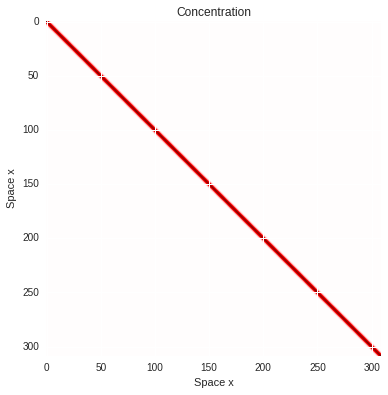

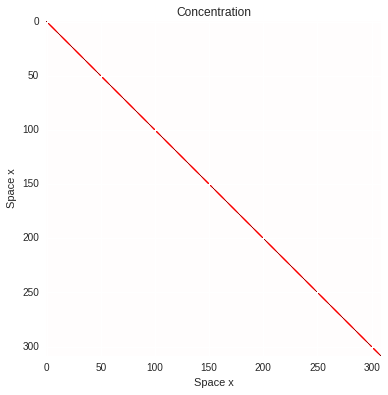

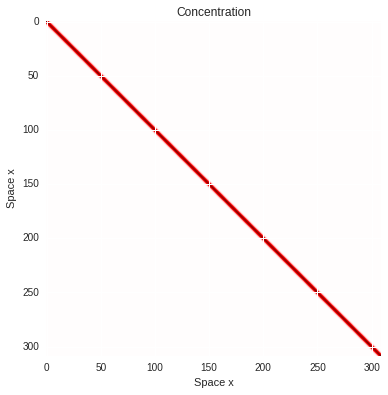

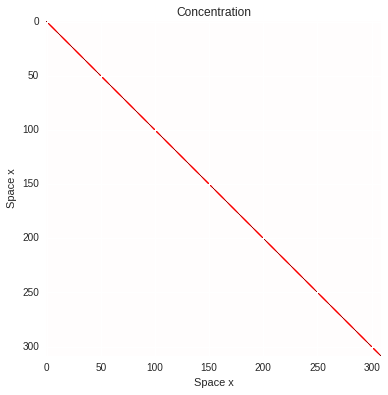

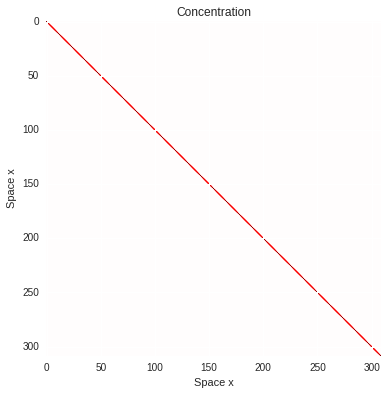

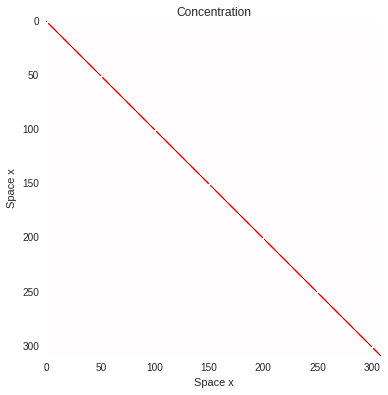

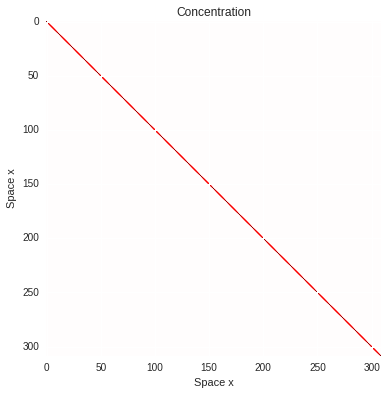

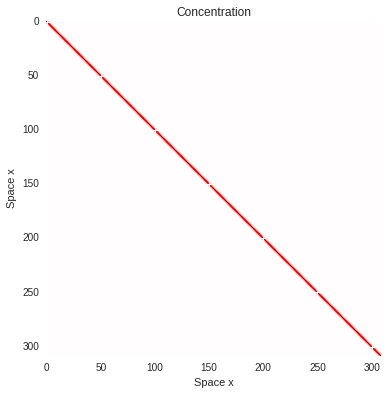

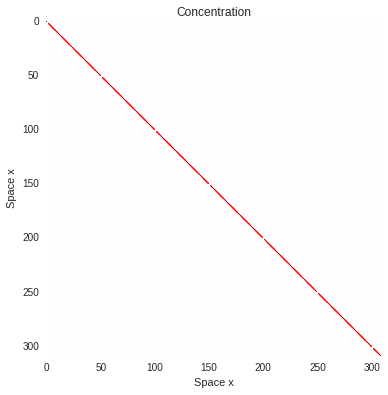

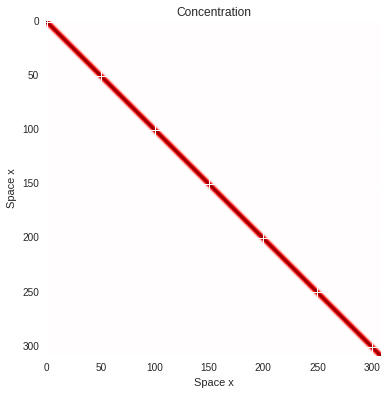

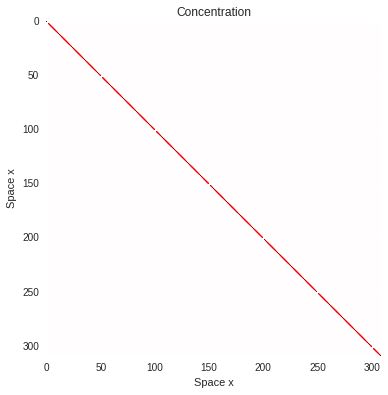

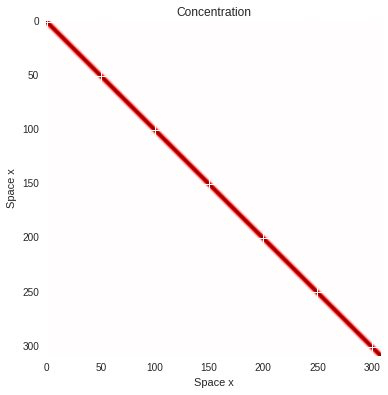

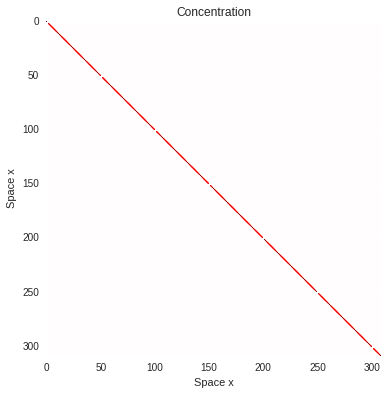

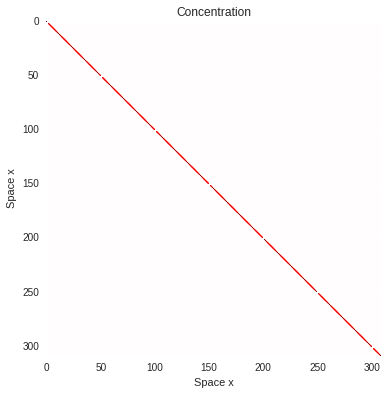

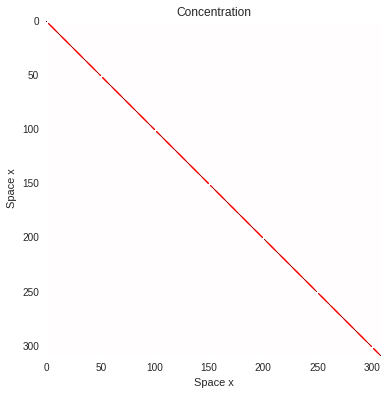

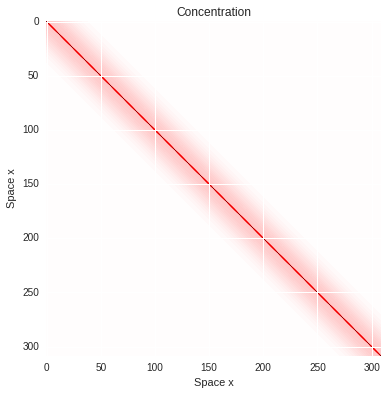

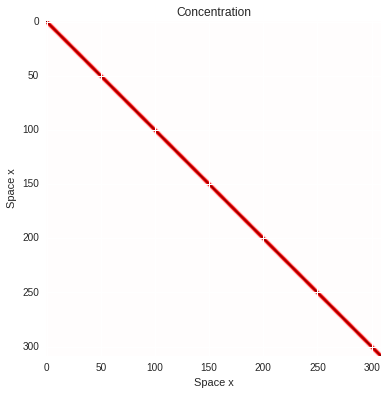

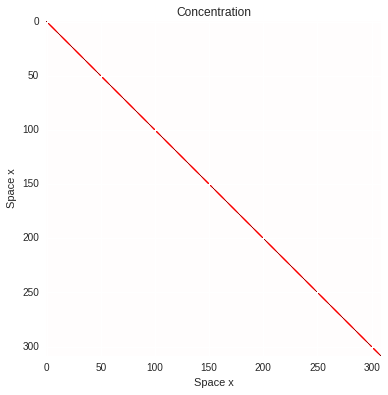

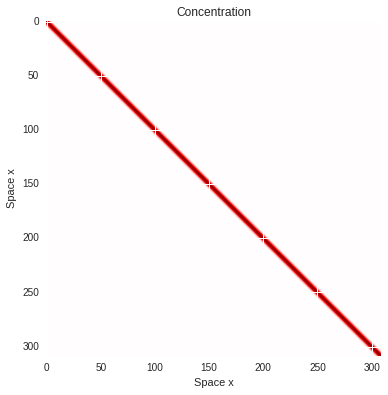

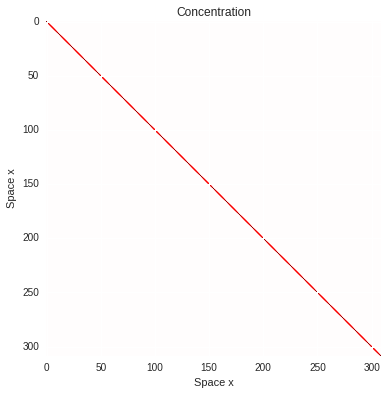

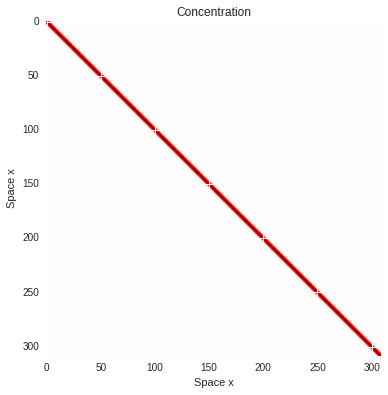

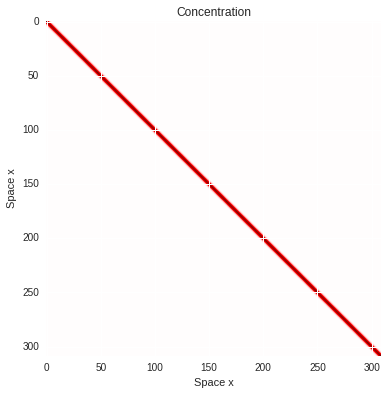

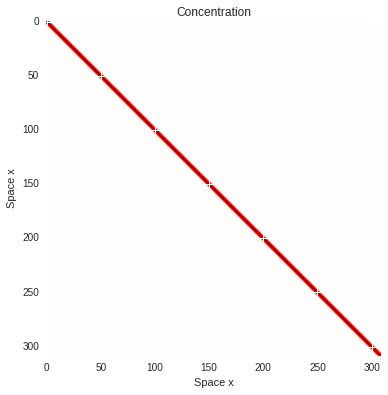

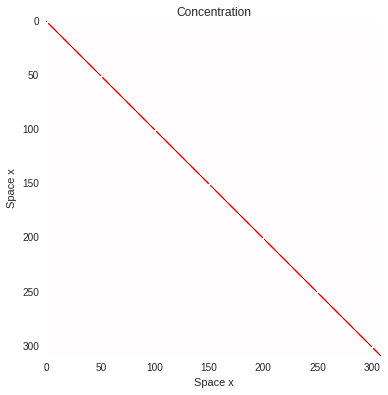

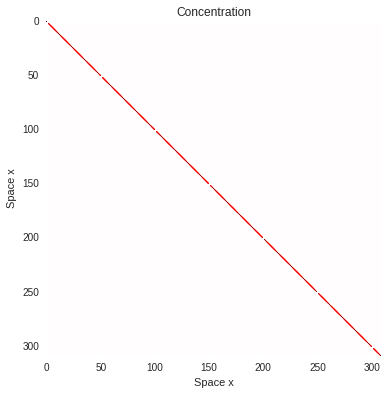

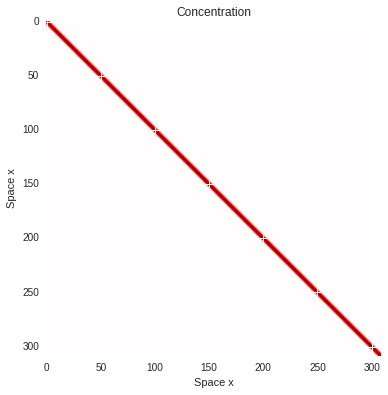

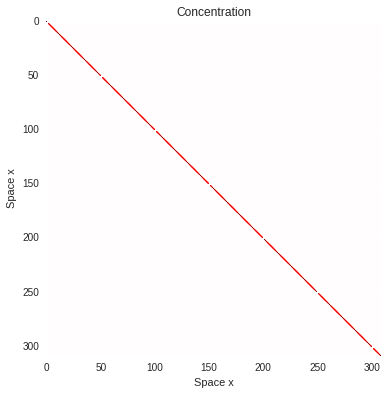

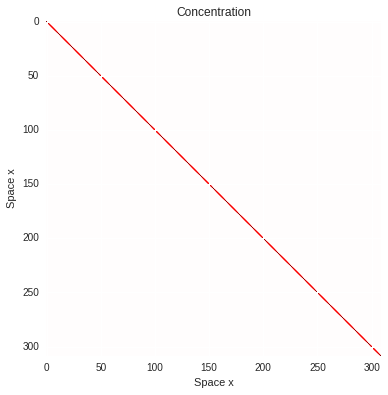

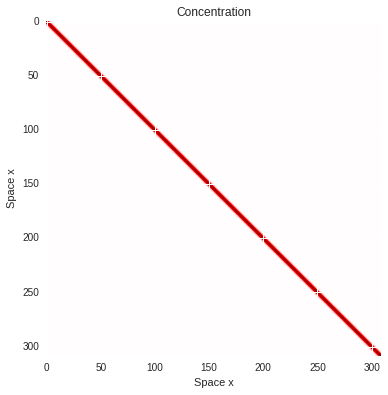

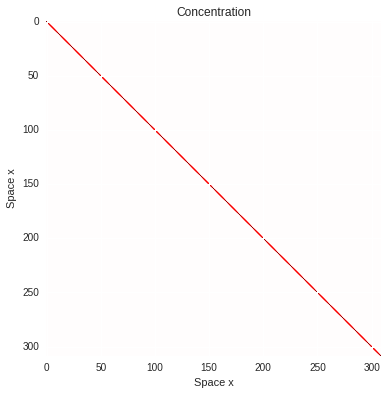

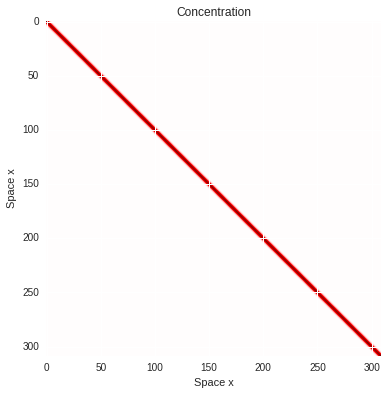

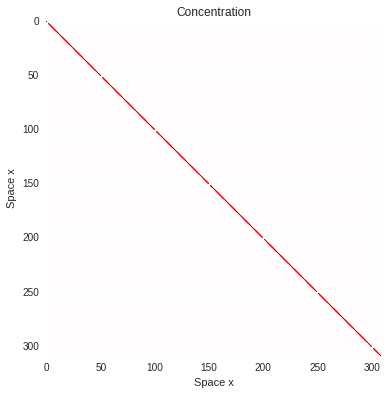

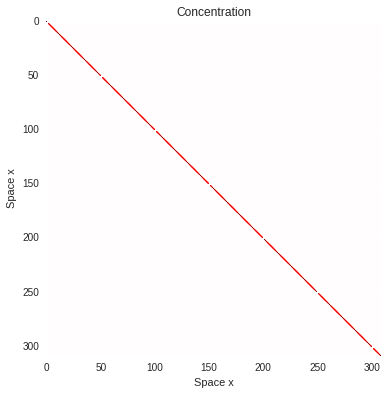

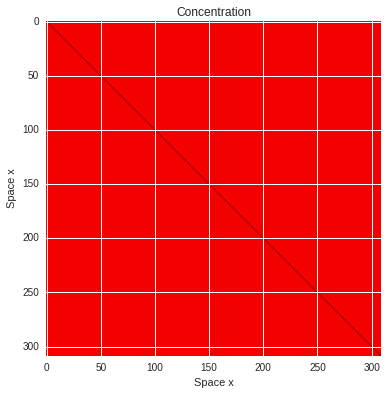

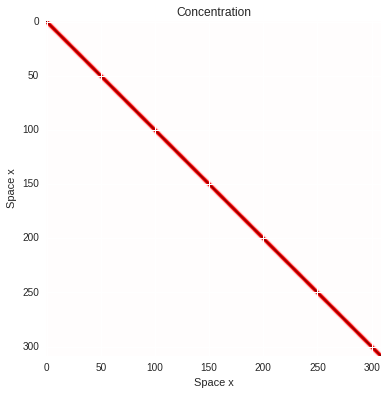

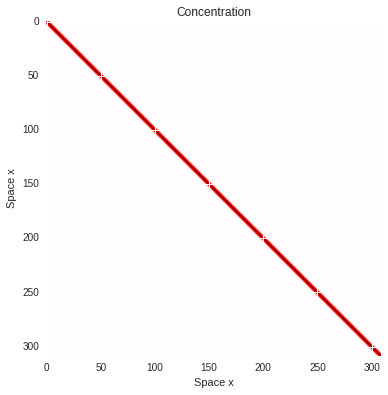

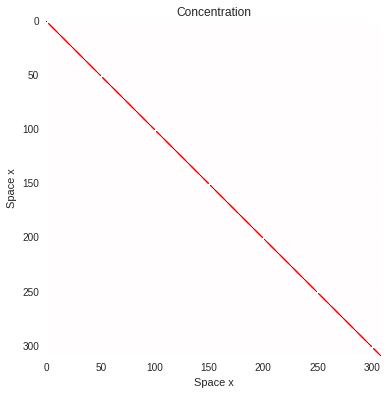

In [292]:
for p in params:
    gp.plot_concentration(params=p)

In [293]:
K = [gp.kernel(params=p, prior=True, noise=True) for p in params]
W = np.ones(len(K))
W /= np.sum(W)
niter = 15

In [296]:
def root(S):
    L, Q = np.linalg.eig(S)
    return np.real(Q.dot(np.diag(L**0.5)).dot(Q.T))

def fixed_point(k0):
    k2 = root(k0)
    r = 0
    for i, (wi,ki) in enumerate(zip(W,K)):
        k2i = root(k2.dot(ki).dot(k2))
        #print(i, k2i)
        r += wi*k2i
    return r

def w2_barycenter(k0):
    k2 = root(k0)
    r = 0
    for wi,ki in zip(W,K):
        r += wi*w2_cost(k0, ki, k2)**2
    return r

In [297]:
b_iter = np.zeros(niter)
w_iter = np.zeros(niter)

kn1 = np.eye(len(K[0]))
for i in range(niter):
    print(100*(i+1)/niter,'%')
    kn = kn1
    kn1 = fixed_point(kn)
    w_iter[i] = w2_cost(kn, kn1)
    b_iter[i] = w2_barycenter(kn1)

6.666666666666667 %
13.333333333333334 %
20.0 %
26.666666666666668 %
33.333333333333336 %
40.0 %
46.666666666666664 %
53.333333333333336 %
60.0 %
66.66666666666667 %
73.33333333333333 %
80.0 %
86.66666666666667 %
93.33333333333333 %
100.0 %


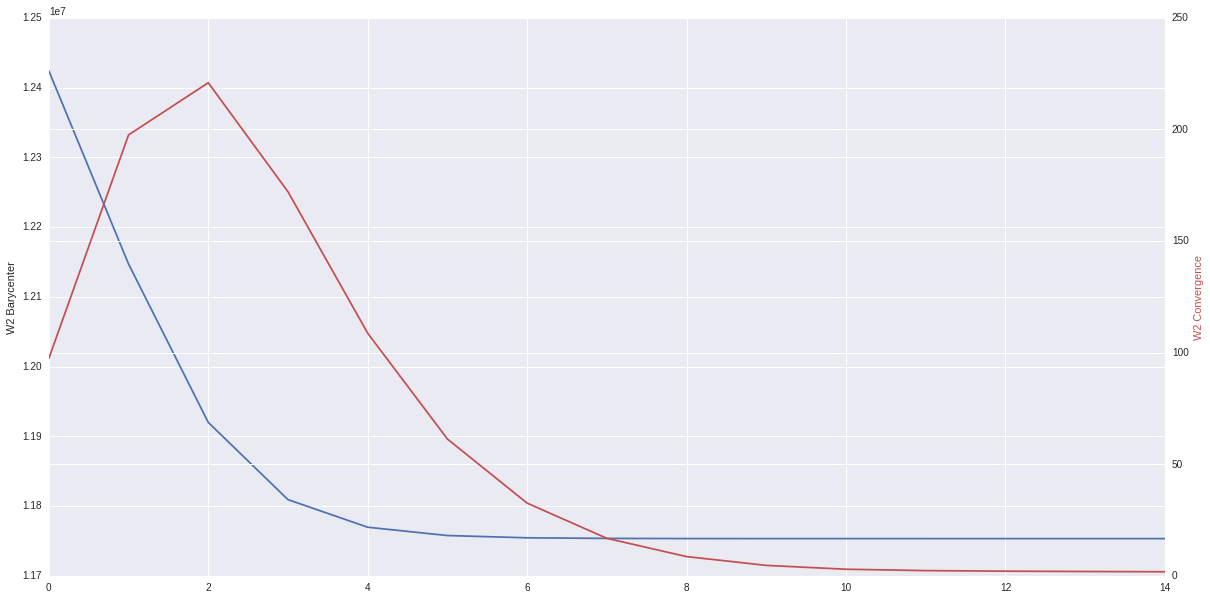

In [298]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('W2 Barycenter')
ax1.plot(b_iter)

ax2 = ax1.twinx()
ax2.set_ylabel('W2 Convergence', color='r')
ax2.plot(w_iter, 'r')

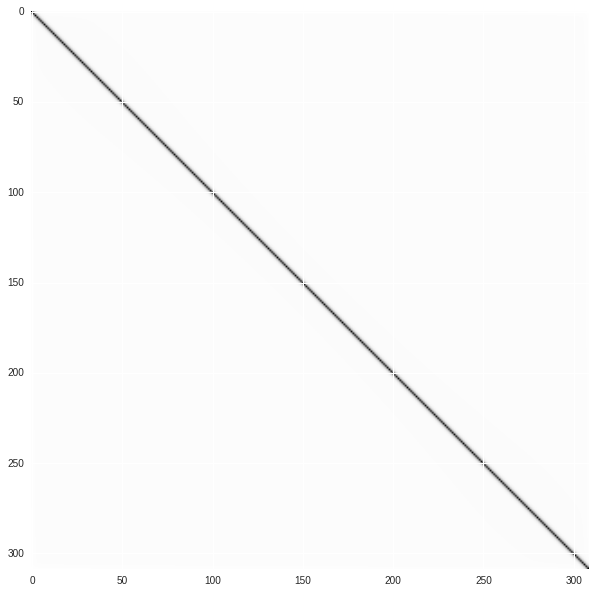

In [301]:
plt.figure(figsize=(10,10))
plt.imshow(kn1)

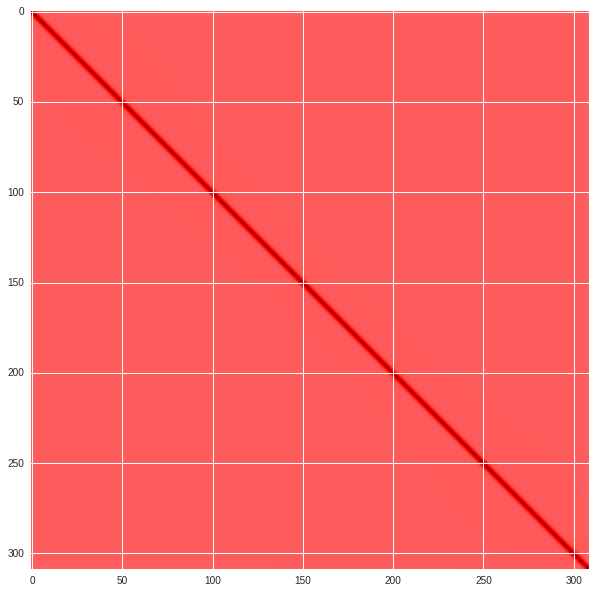

In [302]:
from matplotlib import cm
plt.figure(figsize=(10,10))
v = np.max(np.abs(kn1))
plt.imshow(kn1, cmap=cm.seismic, vmax=v, vmin=-v)

In [389]:
params[0]

{'GP_Bias_Bias': array(75.68425750732422, dtype=float32),
 'GP_Noise_var_log__': array(4.231022834777832, dtype=float32),
 'GP_SE_rate_log__': array([-0.64574045], dtype=float32),
 'GP_SE_var_log__': array(7.930750370025635, dtype=float32)}

In [390]:
ar = gp.active.dict_to_array(params[0])
ar

array([  4.23102283,  -0.64574045,   7.93075037,  75.68425751], dtype=float32)

In [402]:
ar[0] = 8
ar[1] = -10

In [403]:
def find_kernel(x):
    return w2_cost(kn1, gp.kernel(params=gp.active.array_to_dict(x), prior=True, noise=True))

In [404]:
res = sp.optimize.minimize(find_kernel, ar, method='Powell')

In [405]:
gp.active.array_to_dict(res.x)

{'GP_Bias_Bias': array(83.45295715332031, dtype=float32),
 'GP_Noise_var_log__': array(7.415240287780762, dtype=float32),
 'GP_SE_rate_log__': array([-6.69369936], dtype=float32),
 'GP_SE_var_log__': array(6.8322038650512695, dtype=float32)}

In [406]:
from numpy import array, float32

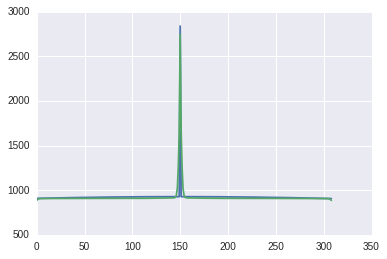

In [463]:
pp = {'GP_Bias_Bias': array(83.45295715332031, dtype=float32),
 'GP_Noise_var_log__': array(7.555240287780762, dtype=float32),
 'GP_SE_rate_log__': array([-6.59369936], dtype=float32),
 'GP_SE_var_log__': array(6.8322038650512695, dtype=float32)}

fk = gp.kernel(params=pp, prior=True, noise=True)
plt.plot(fk[150,:])
plt.plot(kn1[150,:])

In [470]:
fk

array([[ 2837.9609375 ,   927.23120117,   927.22857666, ...,
          849.34350586,   848.85577393,   848.36676025],
       [  927.23120117,  2837.9609375 ,   927.23120117, ...,
          849.82995605,   849.34350586,   848.85577393],
       [  927.22857666,   927.23120117,  2837.9609375 , ...,
          850.31500244,   849.82995605,   849.34350586],
       ..., 
       [  849.34350586,   849.82995605,   850.31500244, ...,
         2837.9609375 ,   927.23120117,   927.22857666],
       [  848.85577393,   849.34350586,   849.82995605, ...,
          927.23120117,  2837.9609375 ,   927.23120117],
       [  848.36676025,   848.85577393,   849.34350586, ...,
          927.22857666,   927.23120117,  2837.9609375 ]], dtype=float32)

In [465]:
kn1

array([[ 2841.37942374,  1632.95494288,  1219.02375437, ...,
          874.18319252,   868.14299485,   857.20859827],
       [ 1632.95494288,  2743.28125472,  1642.32053551, ...,
          884.95653219,   878.98609274,   868.18773793],
       [ 1219.02375437,  1642.32053551,  2742.18241219, ...,
          890.88487853,   884.94867523,   874.21466839],
       ..., 
       [  874.18319252,   884.95653219,   890.88487853, ...,
         2742.17175257,  1642.30153828,  1219.04871826],
       [  868.14299485,   878.98609274,   884.94867523, ...,
         1642.30153828,  2743.26813584,  1632.98101704],
       [  857.20859827,   868.18773793,   874.21466839, ...,
         1219.04871826,  1632.98101704,  2841.42272531]])

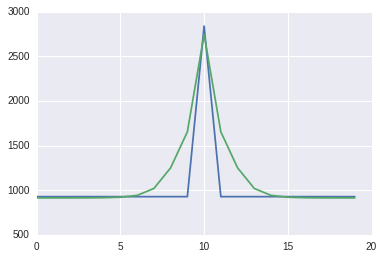

In [468]:
plt.plot(fk[150,140:160])
plt.plot(kn1[150,140:160])

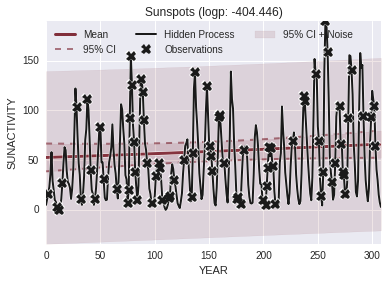

In [469]:
gp.plot(pp)

# Nuevo GP 

In [478]:
pp = {'GP_Bias_Bias': array(83.45295715332031, dtype=float32),
 'GP_Noise_var_log__': array(-7.555240287780762, dtype=float32),
 'GP_SE_rate_log__': array([-6.59369936], dtype=float32),
 'GP_SE_var_log__': array(6.8322038650512695, dtype=float32)}

fk = gp.kernel(params=pp, prior=True, noise=True)
new = kn1 - fk

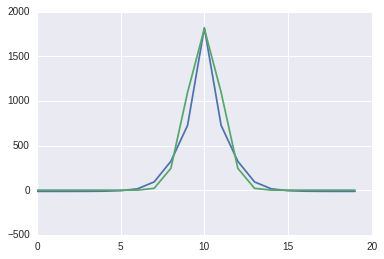

In [585]:
pp2 = {'GP_Bias_Bias': array(83.45295715332031, dtype=float32),
 'GP_Noise_var_log__': array(-7.555240287780762, dtype=float32),
 'GP_SE_rate_log__': array([0.0], dtype=float32),
 'GP_SE_var_log__': array(7.5, dtype=float32)}

fk2 = gp.kernel(pp2, prior=True, noise=False)
plt.plot(new[100,90:110])
plt.plot(fk2[100,90:110])

In [592]:
fk + fk2

array([[ 2735.27490234,  2023.86437988,  1171.92053223, ...,
          849.34350586,   848.85577393,   848.36676025],
       [ 2023.86437988,  2735.27490234,  2023.86437988, ...,
          849.82995605,   849.34350586,   848.85577393],
       [ 1171.92053223,  2023.86437988,  2735.27490234, ...,
          850.31500244,   849.82995605,   849.34350586],
       ..., 
       [  849.34350586,   849.82995605,   850.31500244, ...,
         2735.27490234,  2023.86437988,  1171.92053223],
       [  848.85577393,   849.34350586,   849.82995605, ...,
         2023.86437988,  2735.27490234,  2023.86437988],
       [  848.36676025,   848.85577393,   849.34350586, ...,
         1171.92053223,  2023.86437988,  2735.27490234]], dtype=float32)

In [593]:
kn1

array([[ 2841.37942374,  1632.95494288,  1219.02375437, ...,
          874.18319252,   868.14299485,   857.20859827],
       [ 1632.95494288,  2743.28125472,  1642.32053551, ...,
          884.95653219,   878.98609274,   868.18773793],
       [ 1219.02375437,  1642.32053551,  2742.18241219, ...,
          890.88487853,   884.94867523,   874.21466839],
       ..., 
       [  874.18319252,   884.95653219,   890.88487853, ...,
         2742.17175257,  1642.30153828,  1219.04871826],
       [  868.14299485,   878.98609274,   884.94867523, ...,
         1642.30153828,  2743.26813584,  1632.98101704],
       [  857.20859827,   868.18773793,   874.21466839, ...,
         1219.04871826,  1632.98101704,  2841.42272531]])

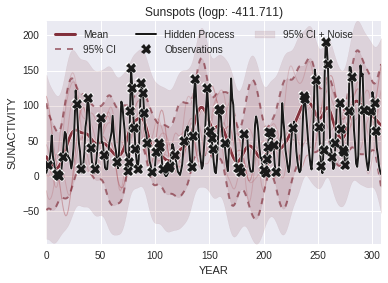

In [595]:
gp2 = g3.GaussianProcess(space=x, location=g3.Bias(), kernel=g3.SE()+g3.RQ(), noisy=True)
gp2.describe('Sunspots', 'YEAR', 'SUNACTIVITY')
gp2.observed(inputs=x_obs, outputs=y_obs, hidden=y)
gp2.plot(samples=5)

In [596]:
gp2.params

{'GP_Bias_Bias': 58.454544,
 'GP_Noise_var_log__': array(7.626455783843994, dtype=float32),
 'GP_RQ_alpha_log__': array(0.0, dtype=float32),
 'GP_RQ_rate_log__': array([-2.06952405], dtype=float32),
 'GP_RQ_var_log__': array(7.626455783843994, dtype=float32),
 'GP_SE_rate_log__': array([-2.06952405], dtype=float32),
 'GP_SE_var_log__': array(7.626455783843994, dtype=float32)}

In [672]:
pp3 = {'GP_Bias_Bias': 83.45295715332031,
 'GP_Noise_var_log__': array(-7.626455783843994, dtype=float32),
 'GP_RQ_alpha_log__': array(0.3, dtype=float32),
 'GP_RQ_rate_log__': array([0.4], dtype=float32),
 'GP_RQ_var_log__': array(7.5, dtype=float32),
 'GP_SE_rate_log__': array([-6.59369936], dtype=float32),
 'GP_SE_var_log__': array(6.8322038650512695, dtype=float32)}

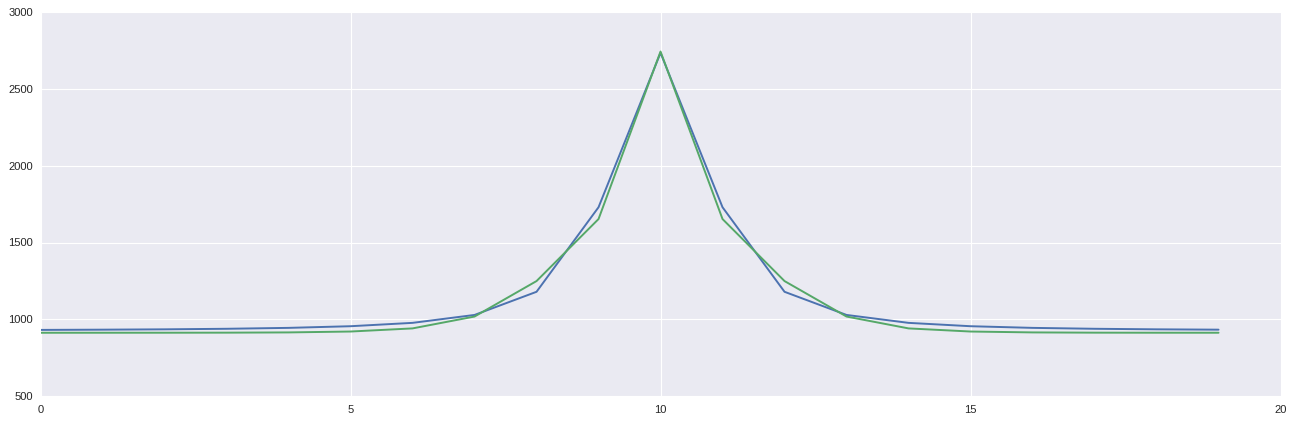

In [673]:
plt.plot(gp2.kernel(pp3, prior=True)[150,140:160])
plt.plot(kn1[150,140:160])

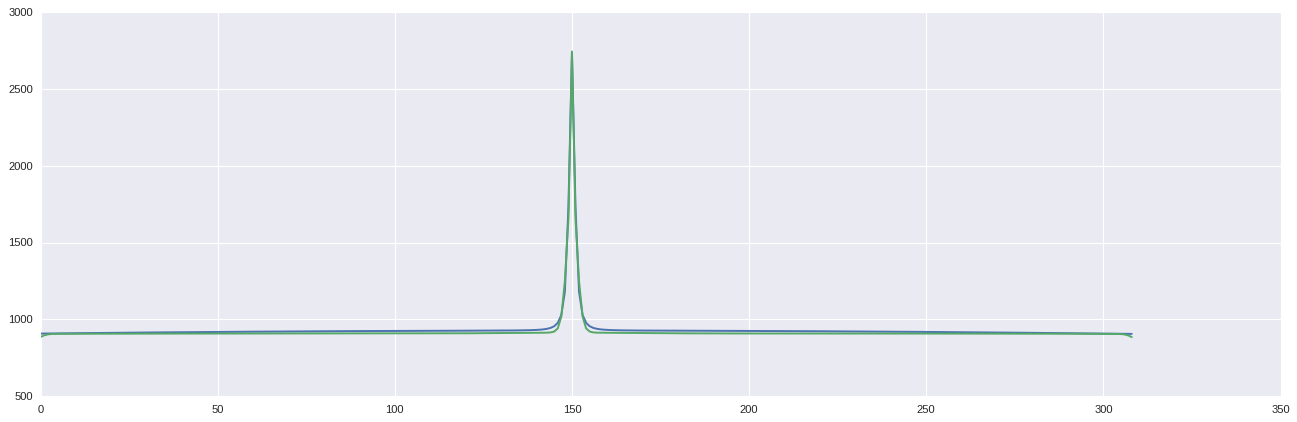

In [674]:
plt.plot(gp2.kernel(pp3, prior=True)[150])
plt.plot(kn1[150])

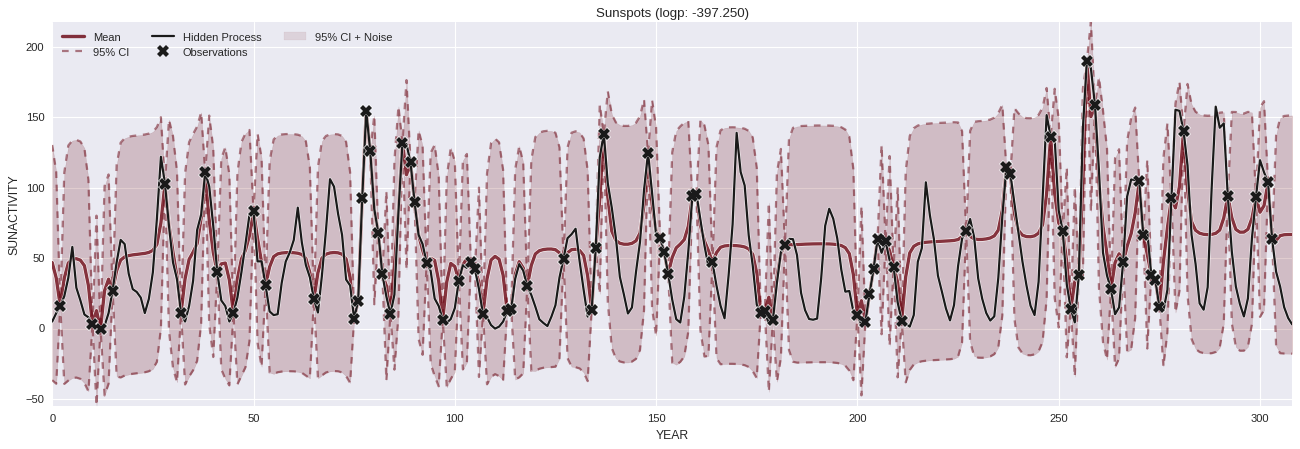

In [676]:
g3.style_seaborn()
gp2.plot(pp3)

In [683]:
pp3['GP_Bias_Bias'] = np.array([pp3['GP_Bias_Bias']])

In [684]:
pp3

{'GP_Bias_Bias': array([ 83.45295715]),
 'GP_Noise_var_log__': array(-7.626455783843994, dtype=float32),
 'GP_RQ_alpha_log__': array(0.30000001192092896, dtype=float32),
 'GP_RQ_rate_log__': array([ 0.40000001], dtype=float32),
 'GP_RQ_var_log__': array(7.5, dtype=float32),
 'GP_SE_rate_log__': array([-6.59369946], dtype=float32),
 'GP_SE_var_log__': array(6.8322038650512695, dtype=float32)}

In [686]:
fm = gp2.find_MAP(start=pp3)

'Starting function value (-logp): 397.25'
'start_bfgs'
         Current function value: 384.638855
         Iterations: 28
         Function evaluations: 108
         Gradient evaluations: 96
'find_MAP'
{'GP_Bias_Bias': array(58.047340393066406, dtype=float32),
 'GP_Noise_var_log__': array(-7.6222968101501465, dtype=float32),
 'GP_RQ_alpha_log__': array(1.895922064781189, dtype=float32),
 'GP_RQ_rate_log__': array([-0.44472909], dtype=float32),
 'GP_RQ_var_log__': array(7.57368803024292, dtype=float32),
 'GP_SE_rate_log__': array([-4.47000265], dtype=float32),
 'GP_SE_var_log__': array(4.684140205383301, dtype=float32)}


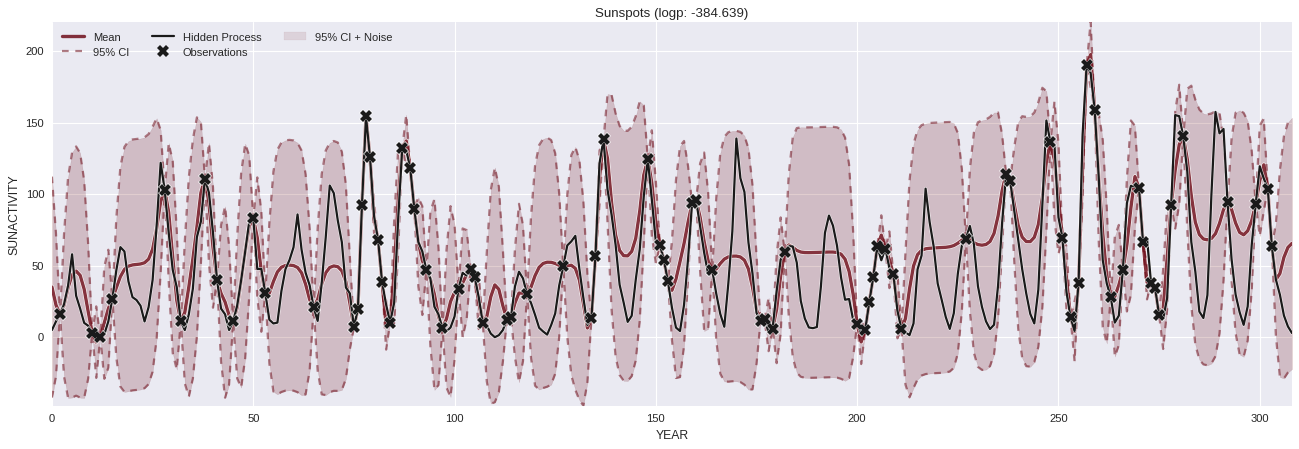

In [689]:
gp2.plot(fm)

In [690]:
gp2.scores(fm)

{'_l1': 16.695544520010838, '_l2': 610.34065690090586}

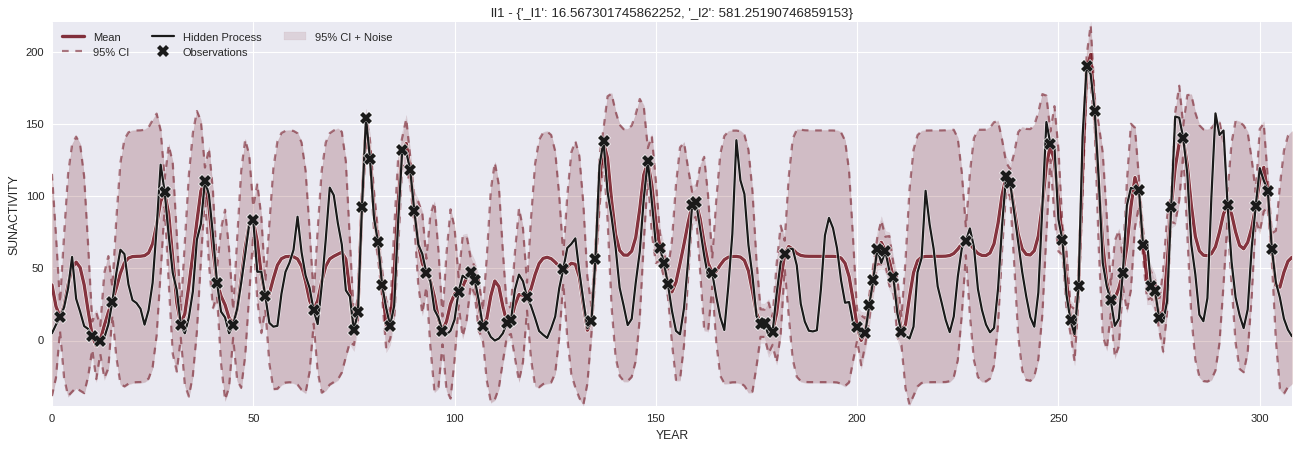

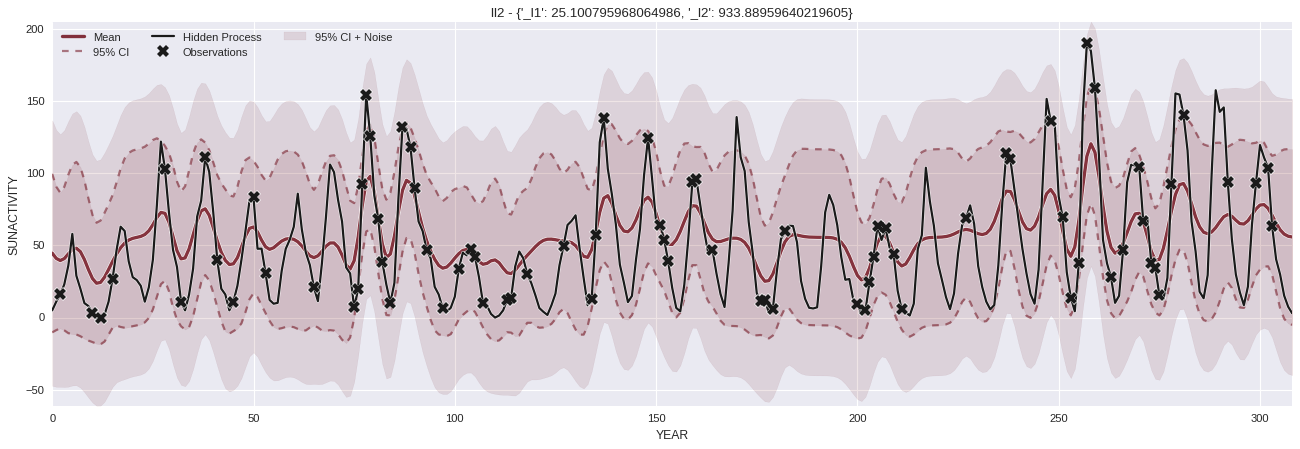

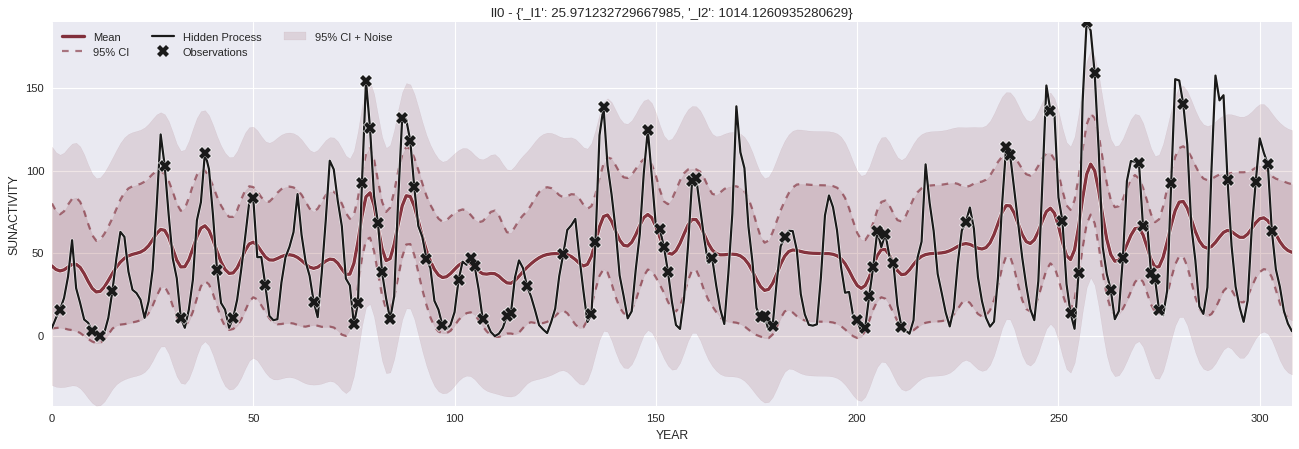

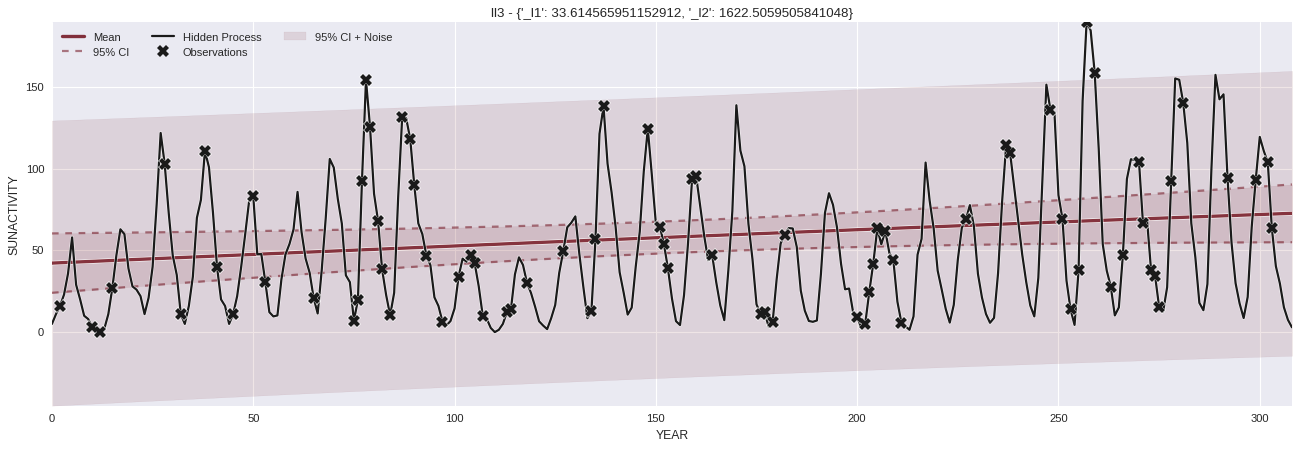

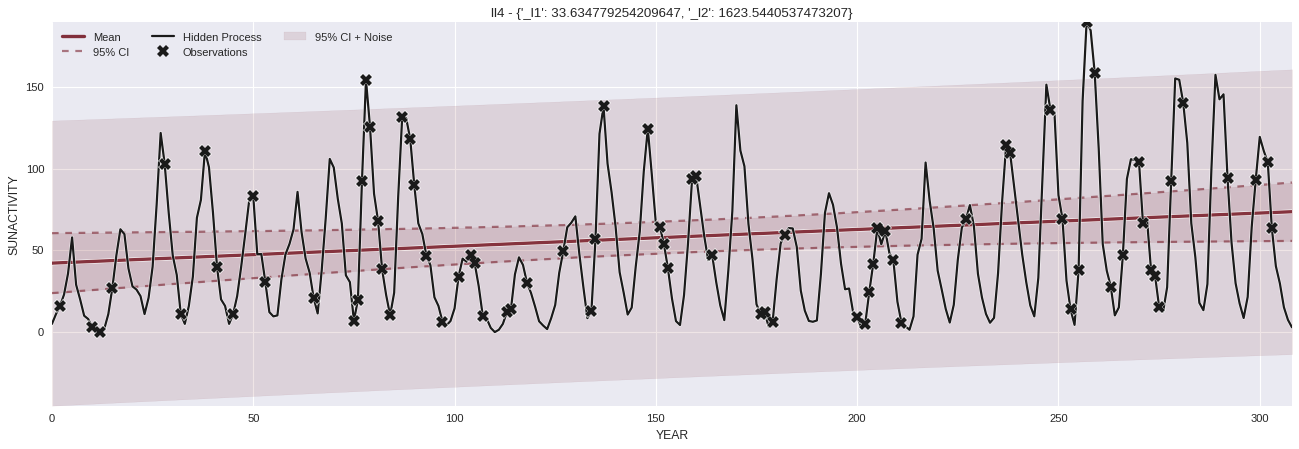

In [677]:
gp.plot_datatrace(g3.find_candidates(datatrace))